In [1]:
# 标准库
import time
from math import sqrt
import os

# 第三方库
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from IPython.display import display

#三大类别数据回归算法
from xgboost import XGBRegressor

# Scikit-learn 库
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFECV
from sklearn.linear_model import BayesianRidge, ElasticNet, LinearRegression, Ridge, RidgeCV, SGDRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import Binarizer, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

sns.set(font='serif', style='ticks')
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.sans-serif']=['Arial Unicode MS']

plt.rcParams['axes.unicode_minus']=False
pd.set_option('display.max_columns',None)

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.optimizers import Adam,Adamax,Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D,MaxPooling1D, MaxPooling2D,GlobalAveragePooling1D,Flatten, Dense

2024-08-25 11:14:11.557539: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-25 11:14:11.993453: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-25 11:14:12.984060: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import pandas as pd

# 读取文件
data1 = pd.read_csv('./data/Vm_vce.csv')
data2 = pd.read_csv('./data/Vm.csv')

X = data1[['m','c','v']]
Y1 = data2[['n', 'k']]

In [3]:
transfer1 = StandardScaler()
X = transfer1.fit_transform(X)

transfer2 = StandardScaler()
Y1 = transfer2.fit_transform(Y1)

In [4]:
samples_per_slice = 701
n_samples = Y1.shape[0] // samples_per_slice
feature_slices_Y1 = Y1[:n_samples * samples_per_slice].reshape((n_samples, samples_per_slice, 2))
Y1 = np.stack(feature_slices_Y1, axis=0)
print(Y1.shape)  # (110, 701, 2)

(606, 701, 2)


In [5]:
x_train, x_test, y_train, y_test =train_test_split(X, Y1, test_size=0.2, random_state=24,shuffle=True)

In [75]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Reshape, Dropout, RepeatVector
from tensorflow.keras.regularizers import l2


l2_reg = l2(1.5597202781122795e-69)
# 建立序列预测模型
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(3,)))
model.add(RepeatVector(701))  # 将输入重复seq_length次来匹配输出的时间步长
model.add(Conv1D(filters=256, kernel_size=4, activation='relu', kernel_regularizer=l2_reg))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=7, activation='relu', kernel_regularizer=l2_reg))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=9, activation='relu', kernel_regularizer=l2_reg))
model.add(MaxPooling1D(pool_size=2))


model.add(Dropout(0.48084570721447256))
model.add(Flatten())

# 通过添加另一个Dense层，然后使用Reshape层调整形状为(701, 2)
model.add(Dense(701 * 2))
model.add(Reshape((701, 2)))

# 输出模型结构
model.summary()

/environment/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_4 (RepeatVector)  │ (None, 701, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 698, 256)       │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 349, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 343, 256)       │       459,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 171, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 163, 256)       │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1402)           │    29,073,274 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 701, 2)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,254,202 (115.41 MB)

 Trainable params: 30,254,202 (115.41 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
callbacks = [EarlyStopping(monitor='val_loss', patience=100, verbose=1, min_delta=0.00001)]

In [77]:
# 编译模型，使用MSE损失函数和SGD优化器
model.compile(loss='mean_squared_error', optimizer=Adamax(learning_rate=0.00034461255991337977))

# 训练模型，假设训练数据为X_train和y_train
history = model.fit(X, Y1, callbacks=callbacks,epochs=1000, batch_size=512, validation_split=0.10745038646600397)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 1.0120 - val_loss: 0.5716
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6474 - val_loss: 0.3763
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4905 - val_loss: 0.1543
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2893 - val_loss: 0.1338
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2329 - val_loss: 0.2606
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2272 - val_loss: 0.1764
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1853 - val_loss: 0.0994
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1542 - val_loss: 0.0741
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1318 - val_loss: 0.0705
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1181 - val_loss: 0.0780
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1195 - val_loss: 0.0597
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.106

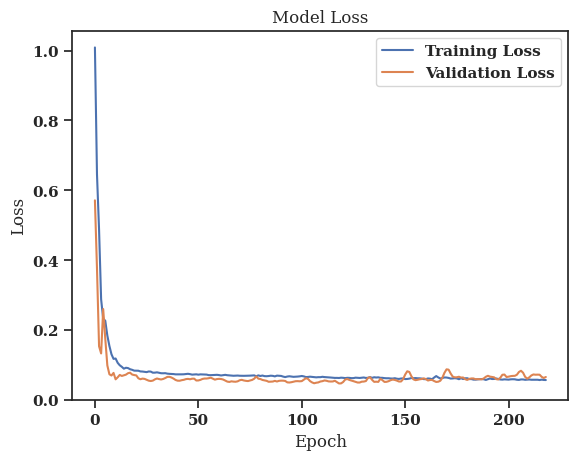

In [78]:
#绘制训练集和验证集的损失曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [79]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [80]:
y_pred.shape

(122, 701, 2)

In [81]:
y_pred_reshaped = y_pred.reshape(-1, 2)
print(y_pred_reshaped.shape)

y_test_reshaped = y_test.reshape(-1, 2)
print(y_test_reshaped.shape)

(85522, 2)
(85522, 2)


In [82]:
# 通过inverse_transform方法将标准化后的输出还原为原始值
y_pred_reshaped = transfer2.inverse_transform(y_pred_reshaped)

# 同样，如果想要还原测试集中的真实值
y_test_reshaped = transfer2.inverse_transform(y_test_reshaped)

In [83]:
# 提取前701个的第一列和第二列
n_pred = y_pred_reshaped[:, 0]
n_test = y_test_reshaped[:, 0]
k_pred = y_pred_reshaped[:, 1]
k_test = y_test_reshaped[:, 1]
# PSI_pred = y_pred_reshaped[:, 2]
# PSI_test = y_test_reshaped[:, 2]
# DELTA_pred = y_pred_reshaped[:, 3]
# DELTA_test = y_test_reshaped[:, 3]

# 打印形状
print(n_pred.shape)  # 输出(122, 701)
print(n_test.shape)  # 输出(122, 701)
print(k_pred.shape)  # 输出(122, 701)
print(k_test.shape)  # 输出(122, 701)
# print(PSI_pred.shape)  # 输出(122, 701)
# print(PSI_test.shape)  # 输出(122, 701)
# print(DELTA_pred.shape)  # 输出(122, 701)
# print(DELTA_test.shape)  # 输出(122, 701)

(85522,)
(85522,)
(85522,)
(85522,)


In [84]:
mse = mean_squared_error(n_test, n_pred)
print("n_test MSE: ", mse)
rmse = np.sqrt(mse)
print("n_test RMSE: ", rmse)
mae = mean_absolute_error(n_test, n_pred)
print("n_test MAE: ", mae)
r2 = r2_score(n_test, n_pred)
print("n_test R2 score: ", r2)

n_test MSE:  0.007632366973026369
n_test RMSE:  0.08736341896369652
n_test MAE:  0.0652233455732508
n_test R2 score:  0.8878941610605622


In [85]:
mse = mean_squared_error(k_test, k_pred)
print("k_test MSE: ", mse)
rmse = np.sqrt(mse)
print("k_test RMSE: ", rmse)
mae = mean_absolute_error(k_test, k_pred)
print("k_test MAE: ", mae)
r2 = r2_score(k_test, k_pred)
print("k_test R2 score: ", r2)

k_test MSE:  0.0014406894235723048
k_test RMSE:  0.03795641478817915
k_test MAE:  0.019569957369008784
k_test R2 score:  0.9909075029359876


In [23]:
samples_per_slice = 701
n_samples = n_pred.shape[0] // samples_per_slice
feature_slices_pred = n_pred[:n_samples * samples_per_slice].reshape((n_samples, samples_per_slice, 1))
n_pred = np.stack(feature_slices_pred, axis=0)
print(n_pred.shape) 

samples_per_slice = 701
n_samples = n_test.shape[0] // samples_per_slice
feature_slices_test = n_test[:n_samples * samples_per_slice].reshape((n_samples, samples_per_slice, 1))
n_test = np.stack(feature_slices_test, axis=0)
print(n_test.shape)

samples_per_slice = 701
n_samples = k_pred.shape[0] // samples_per_slice
feature_slices_pred = k_pred[:n_samples * samples_per_slice].reshape((n_samples, samples_per_slice, 1))
k_pred = np.stack(feature_slices_pred, axis=0)
print(k_pred.shape) 

samples_per_slice = 701
n_samples = k_test.shape[0] // samples_per_slice
feature_slices_test = k_test[:n_samples * samples_per_slice].reshape((n_samples, samples_per_slice, 1))
k_test = np.stack(feature_slices_test, axis=0)
print(k_test.shape)

(122, 701, 1)
(122, 701, 1)
(122, 701, 1)
(122, 701, 1)


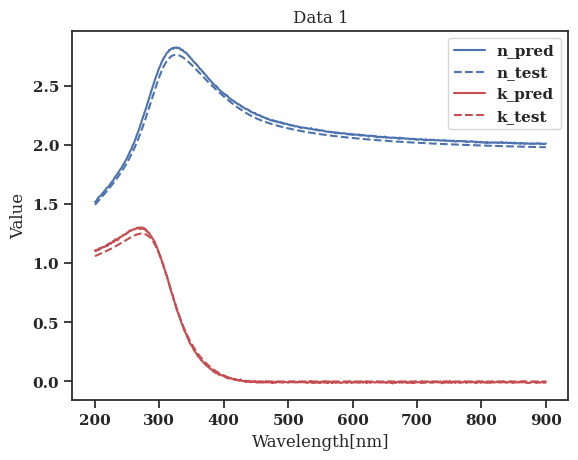

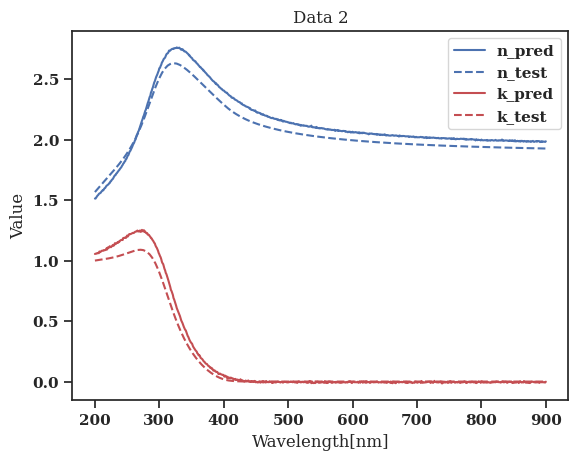

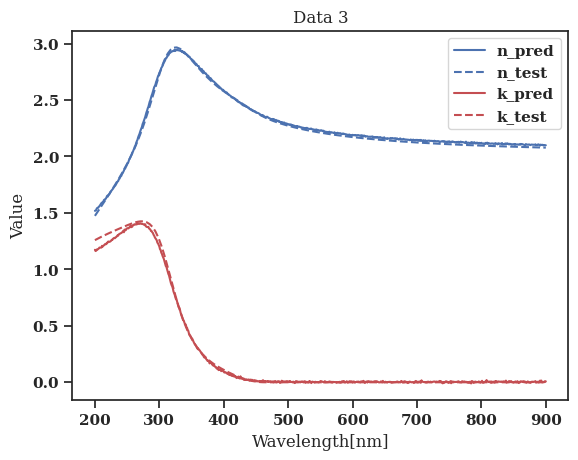

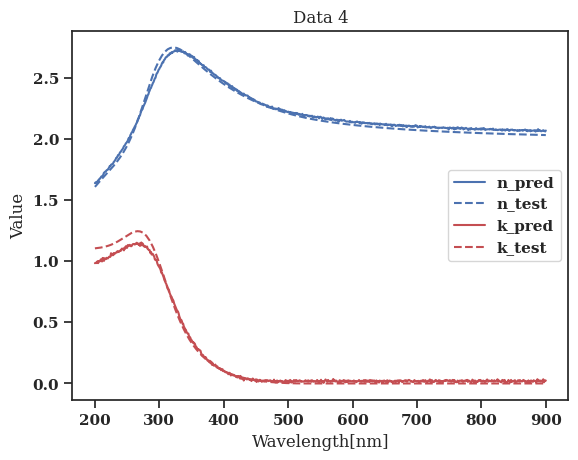

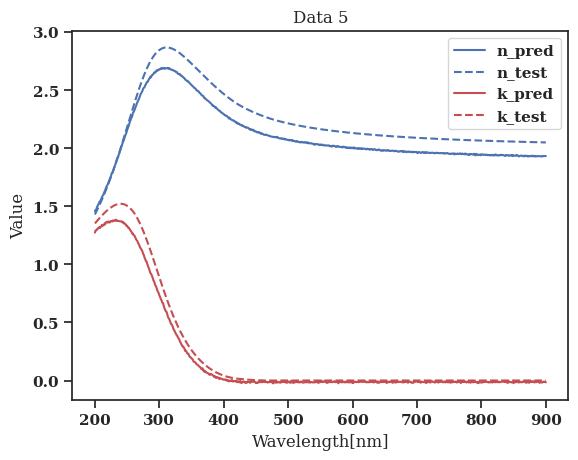

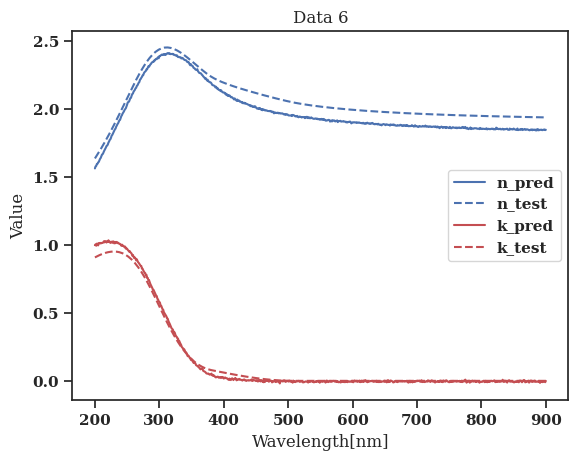

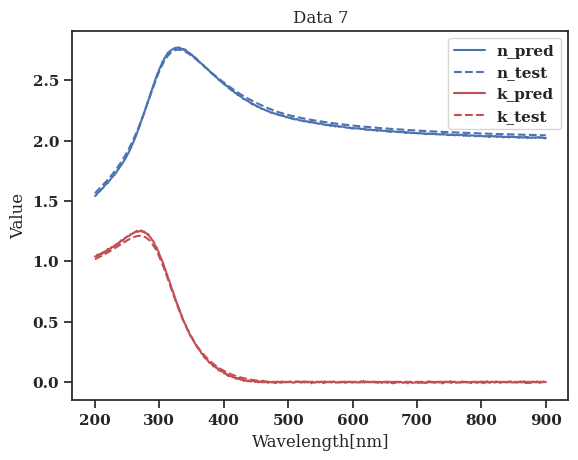

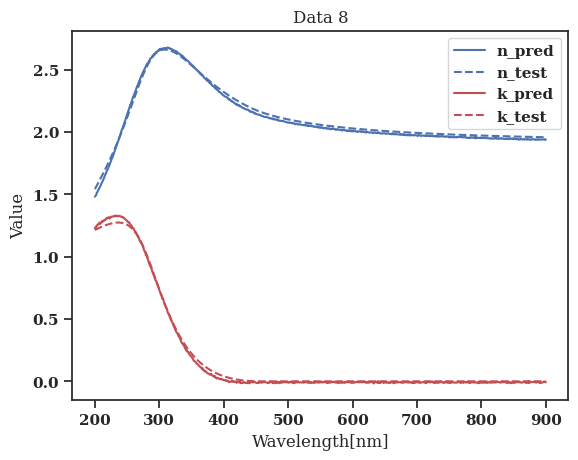

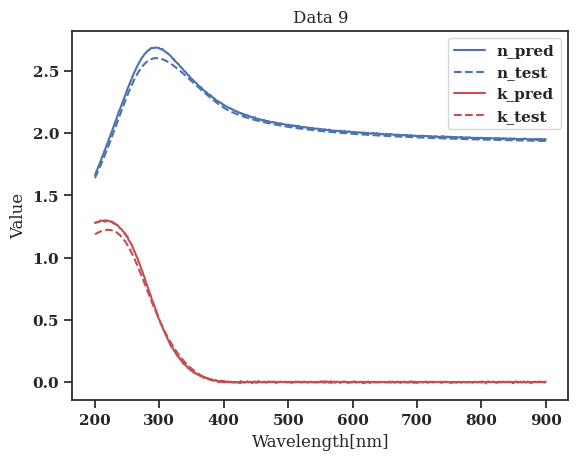

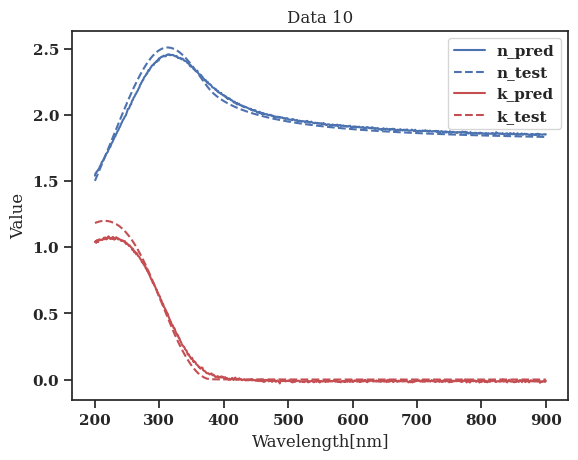

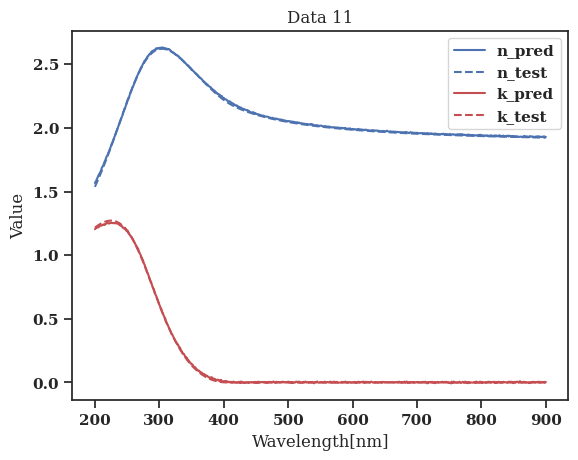

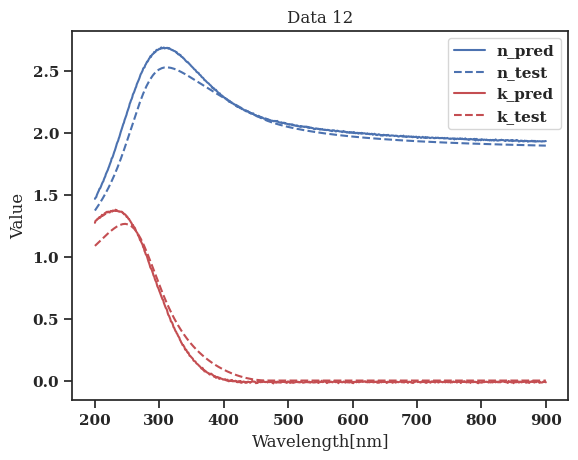

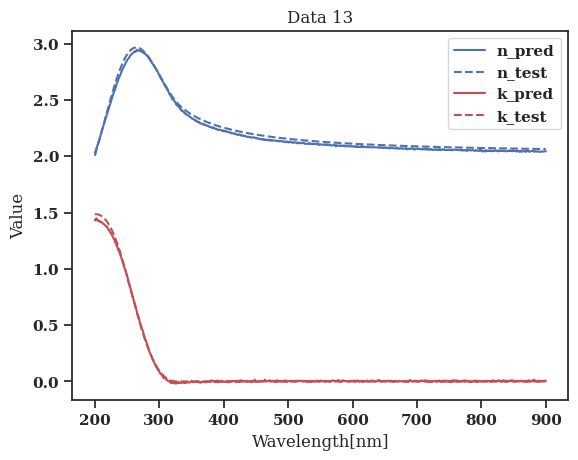

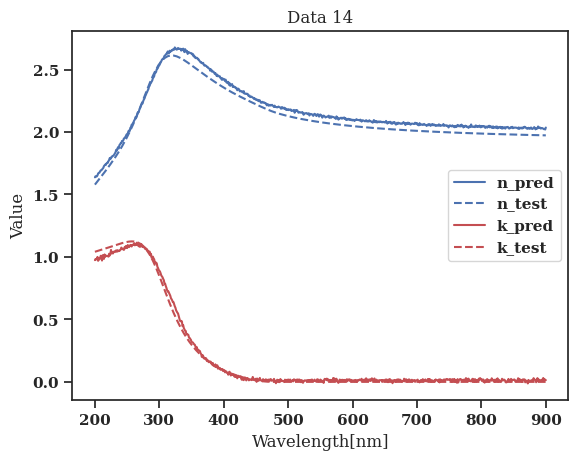

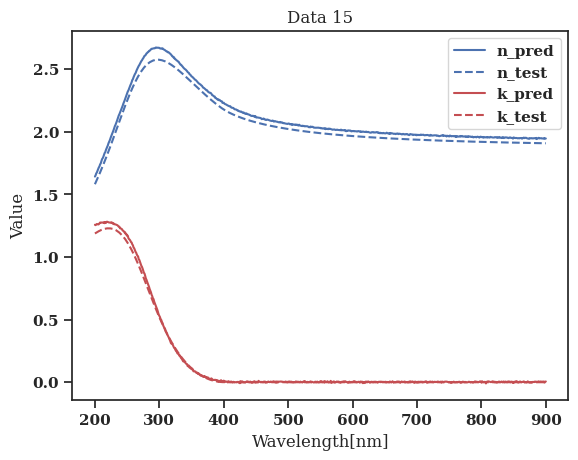

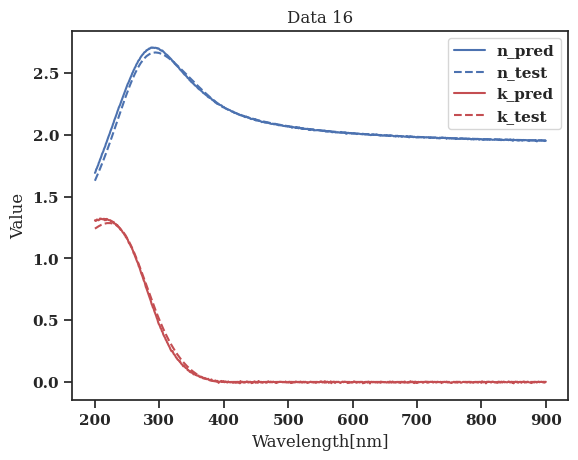

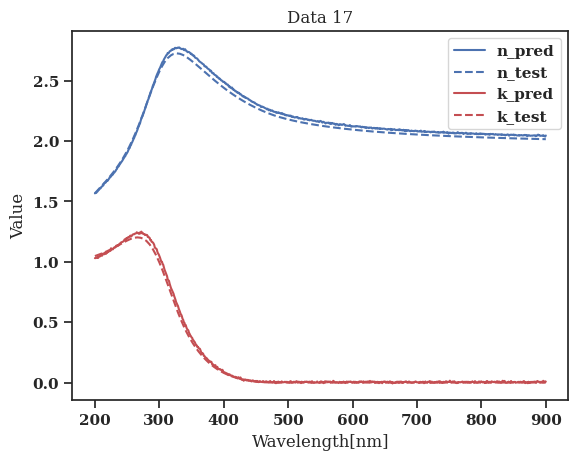

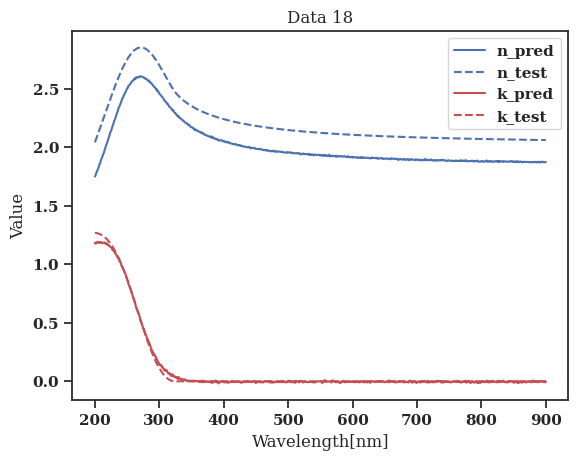

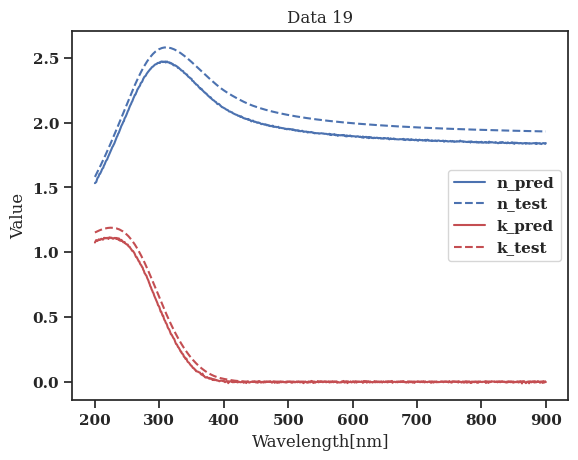

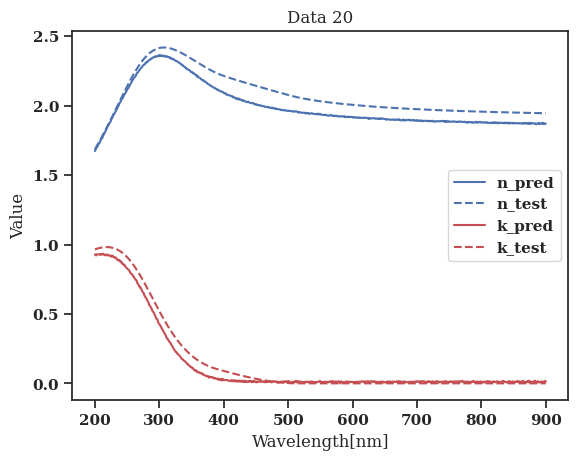

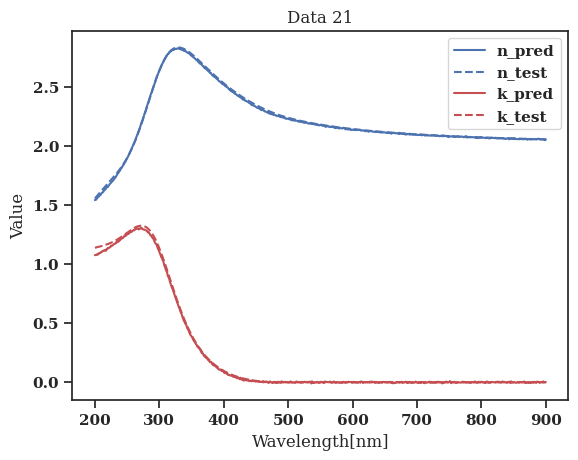

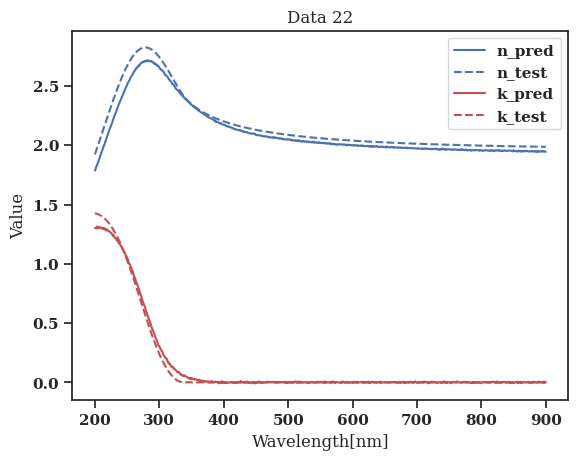

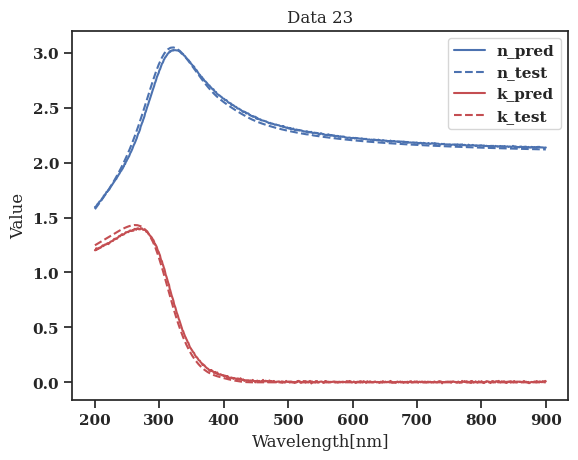

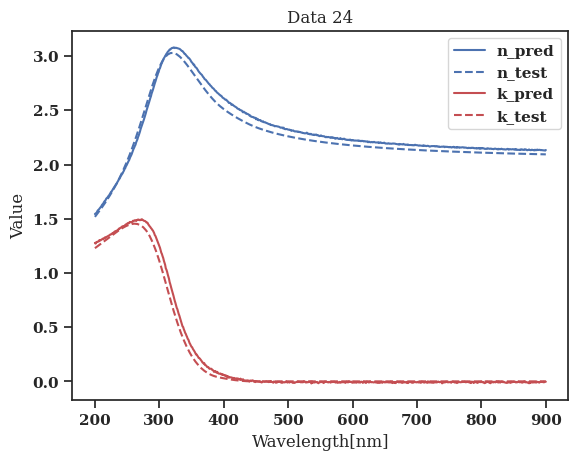

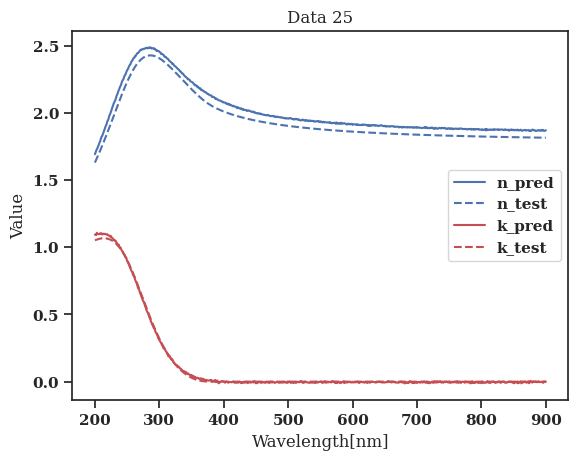

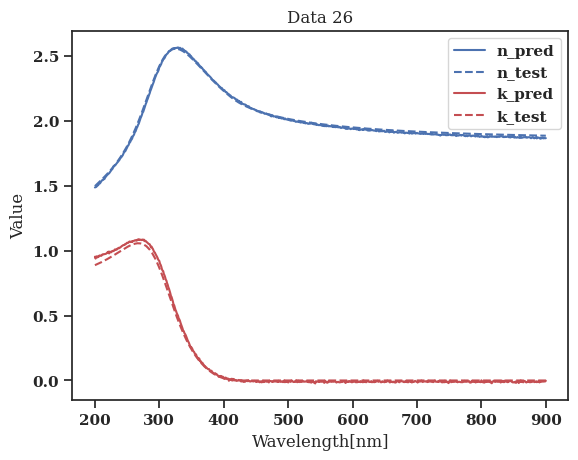

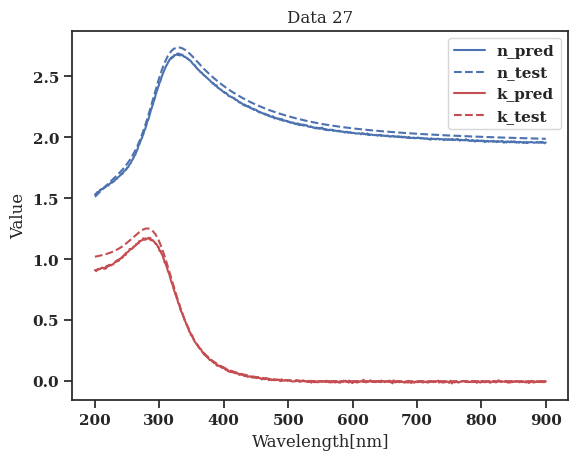

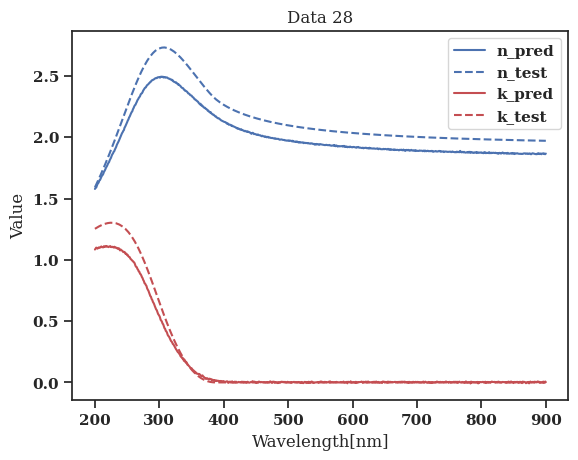

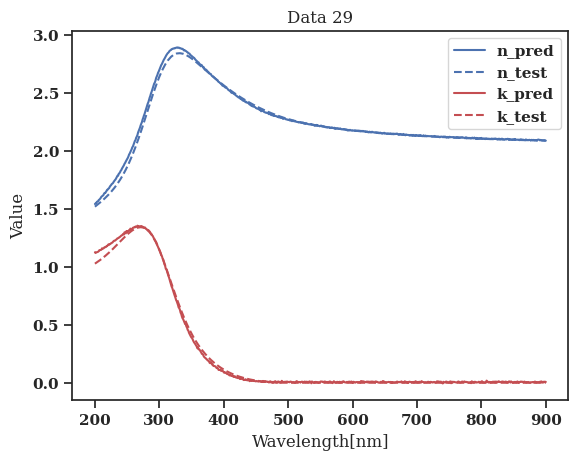

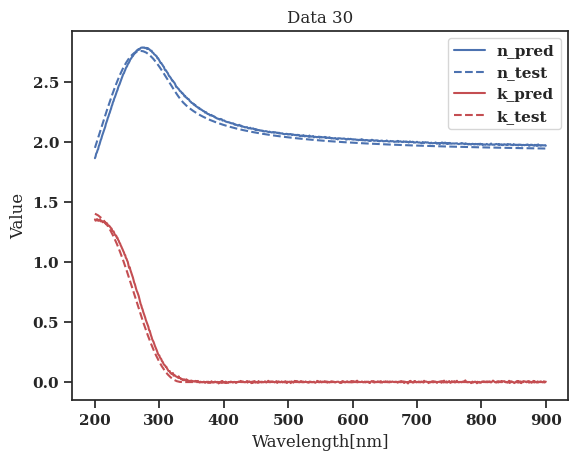

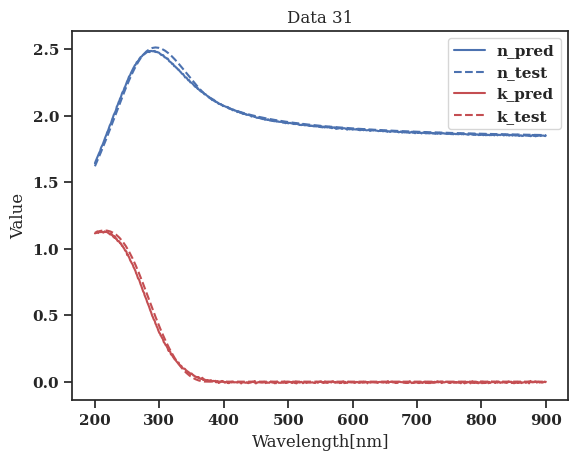

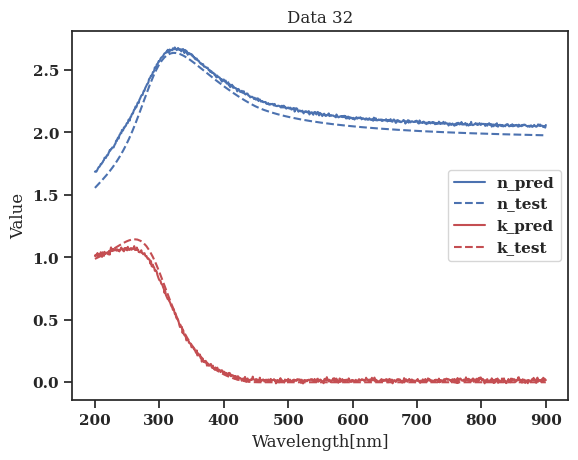

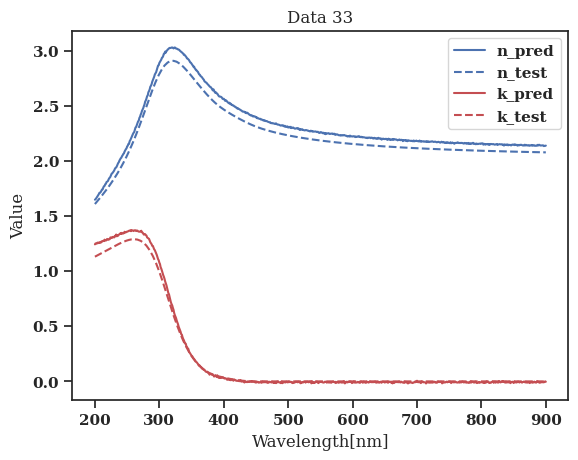

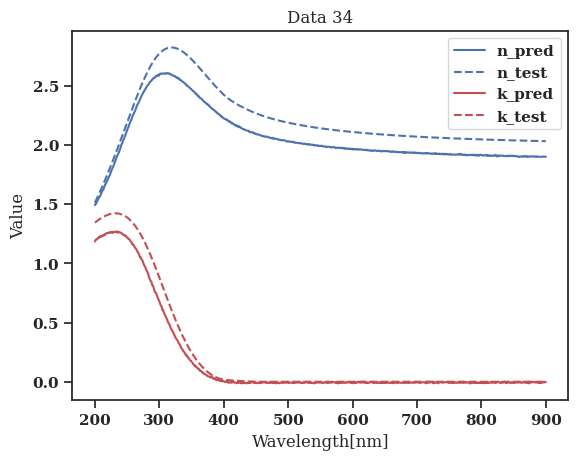

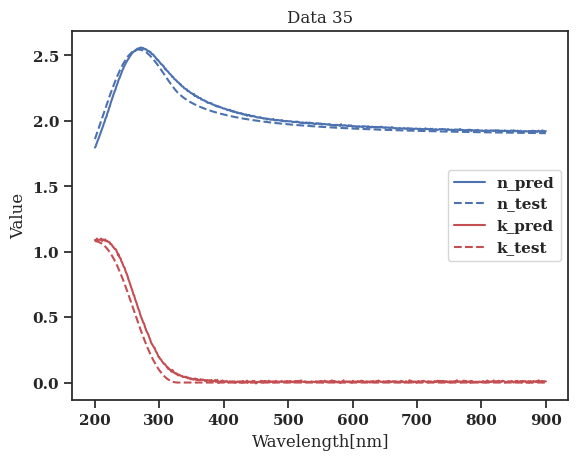

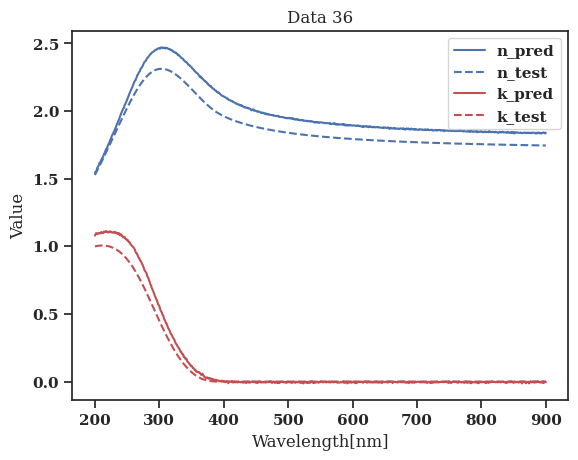

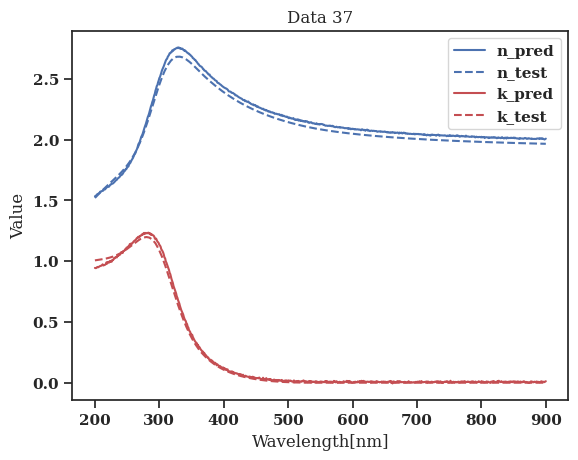

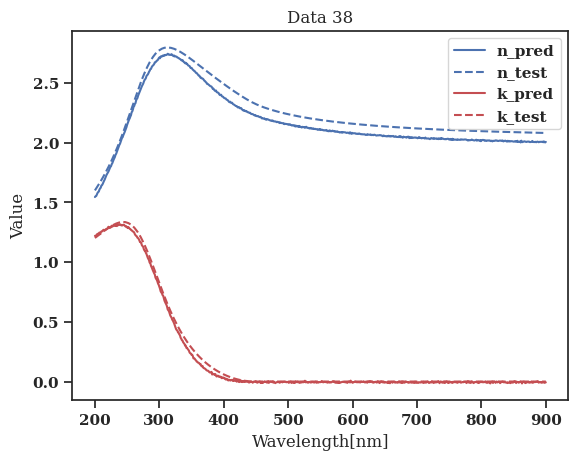

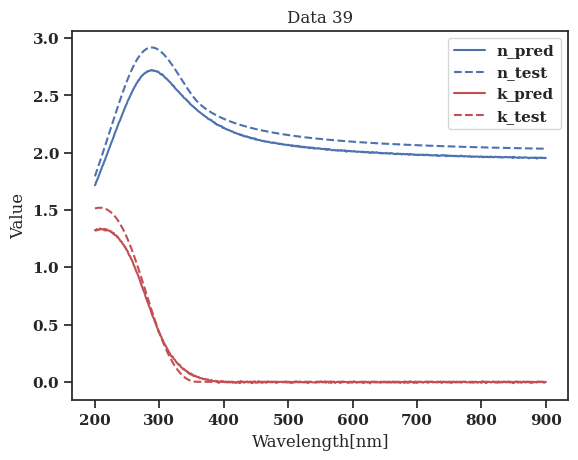

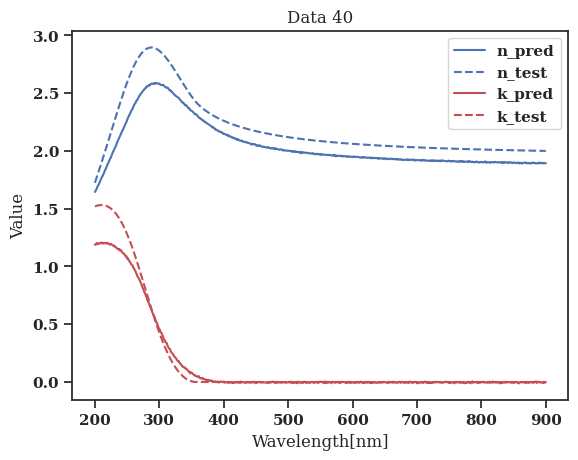

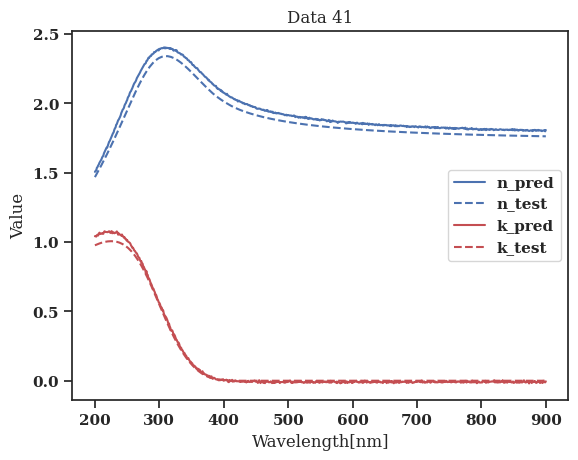

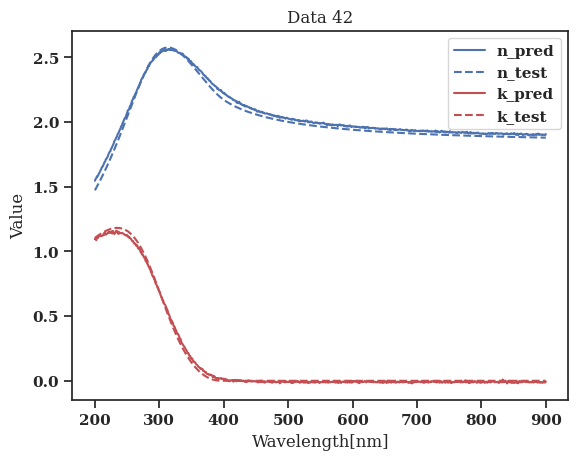

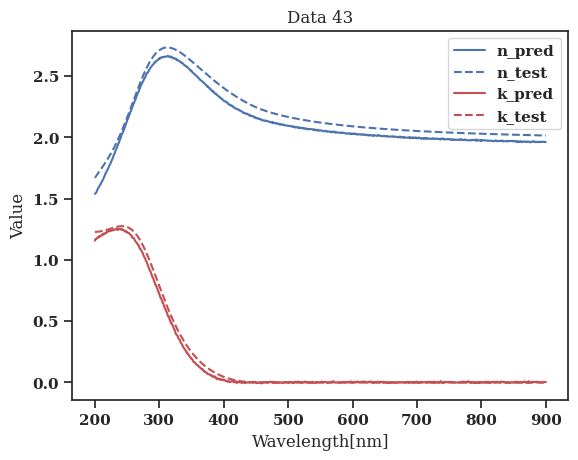

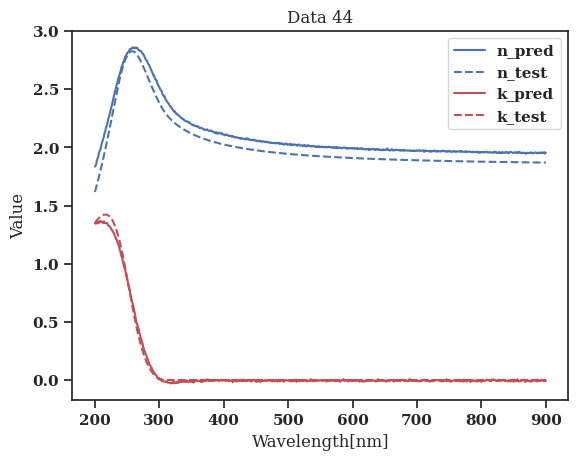

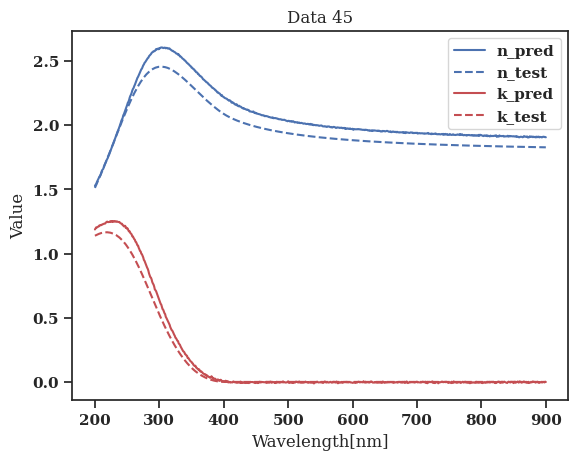

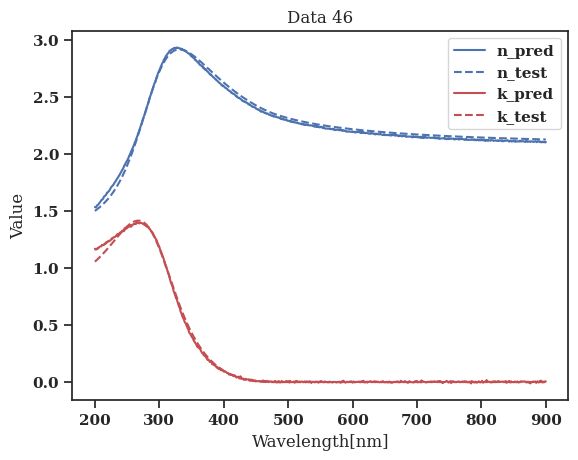

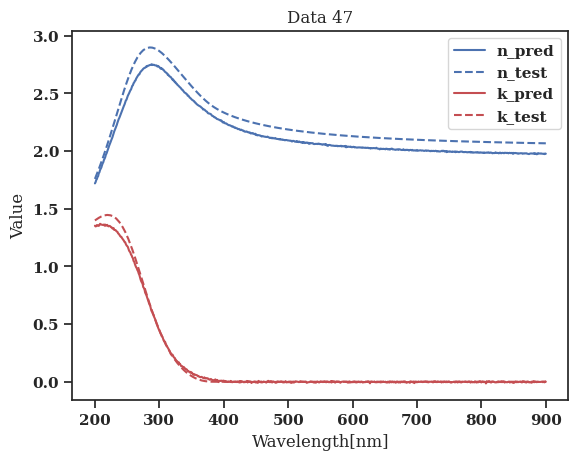

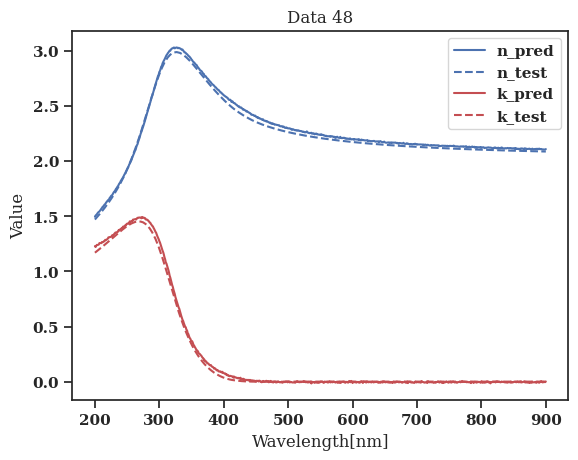

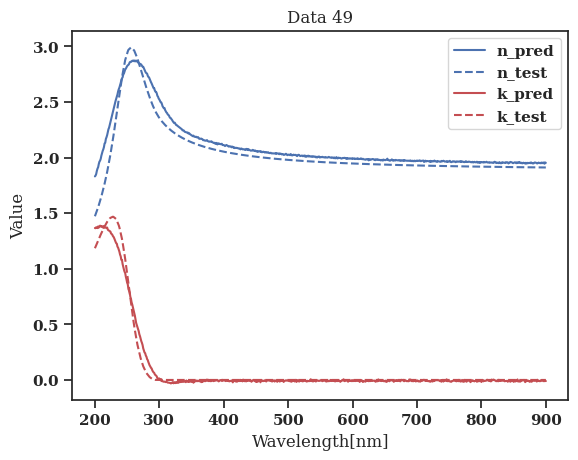

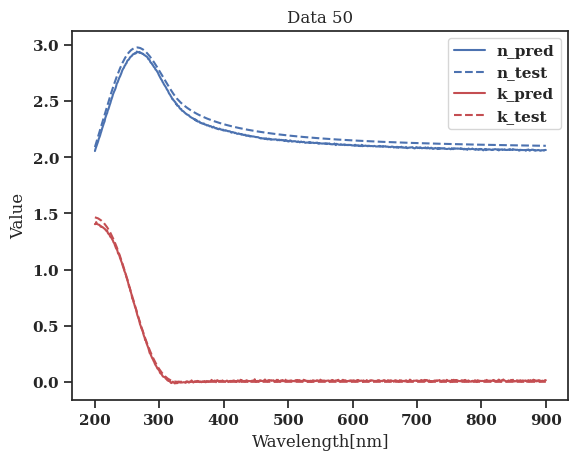

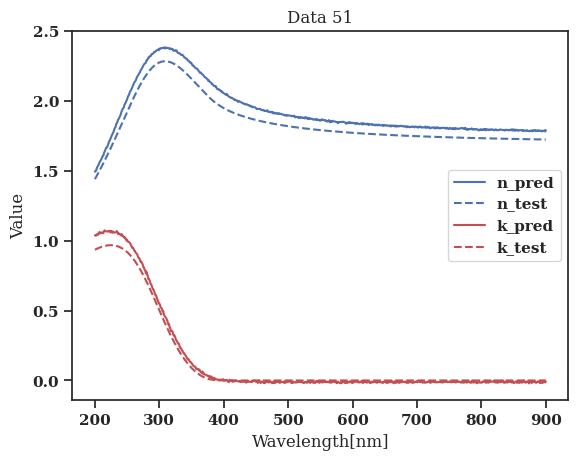

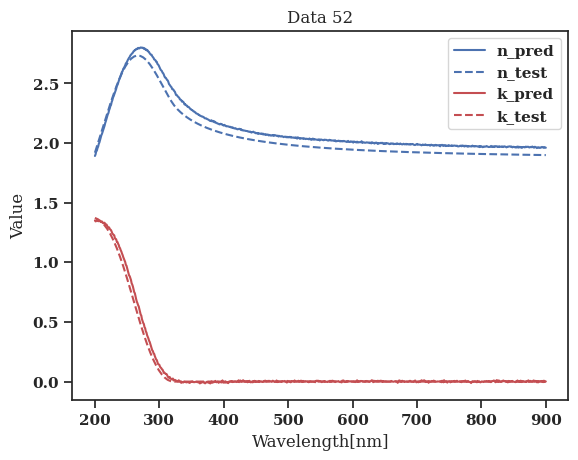

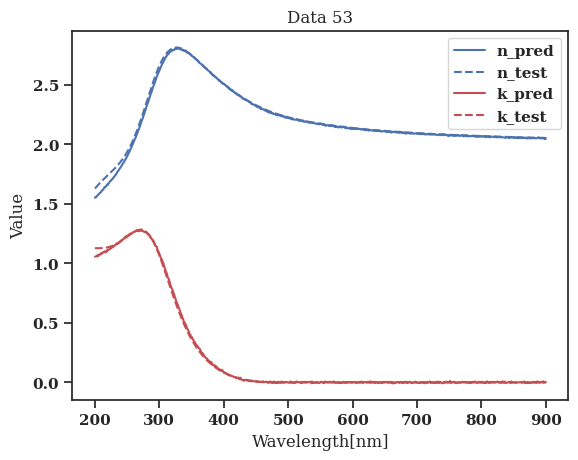

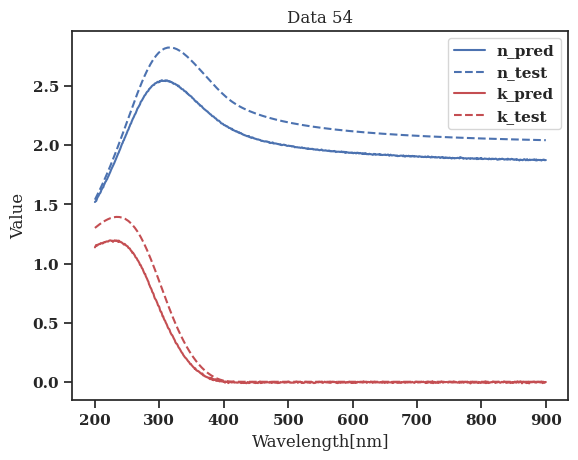

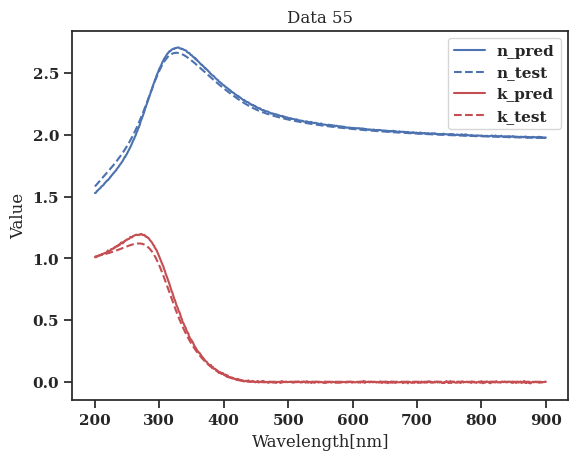

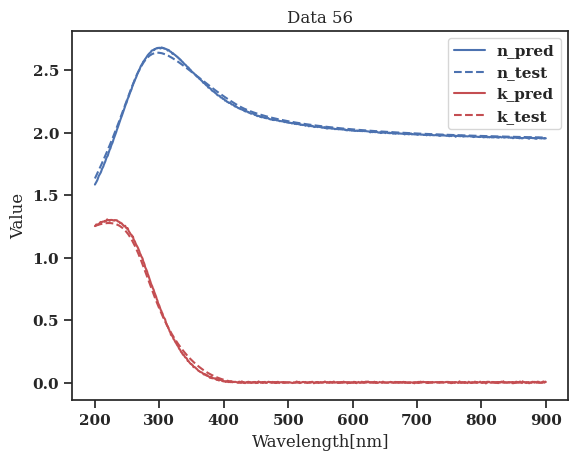

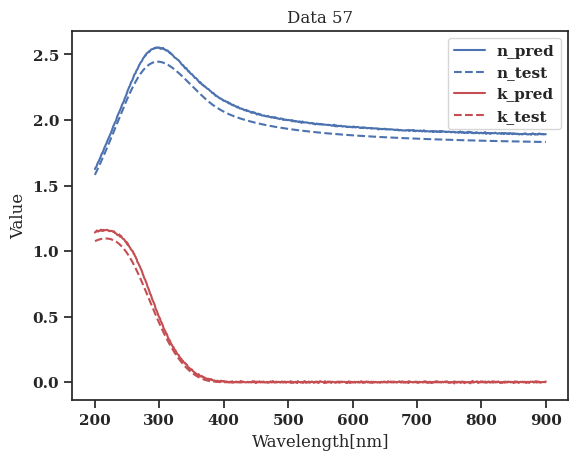

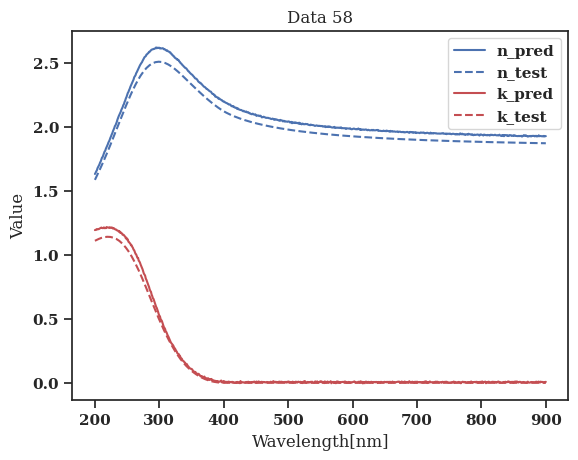

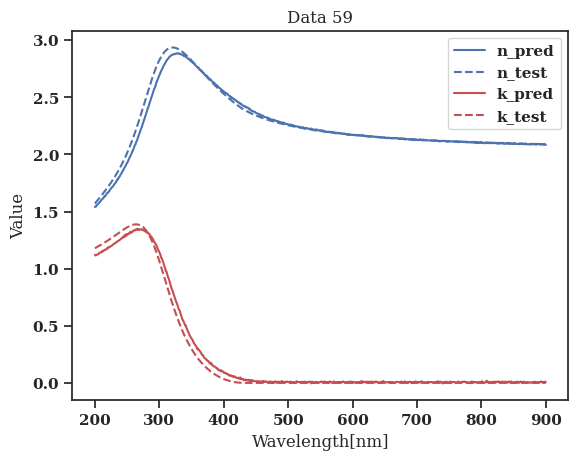

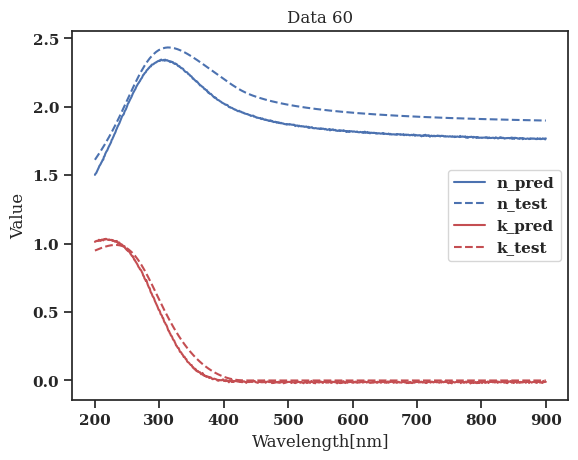

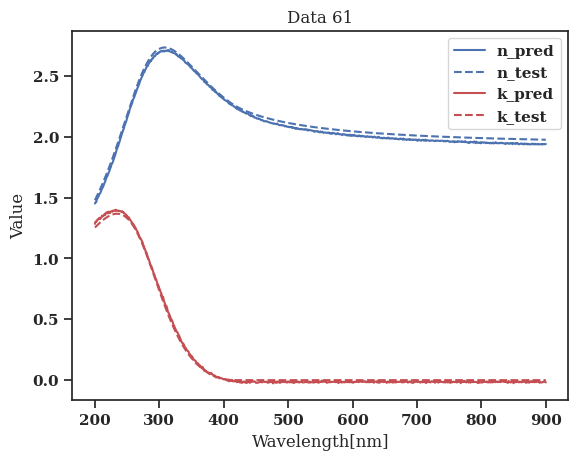

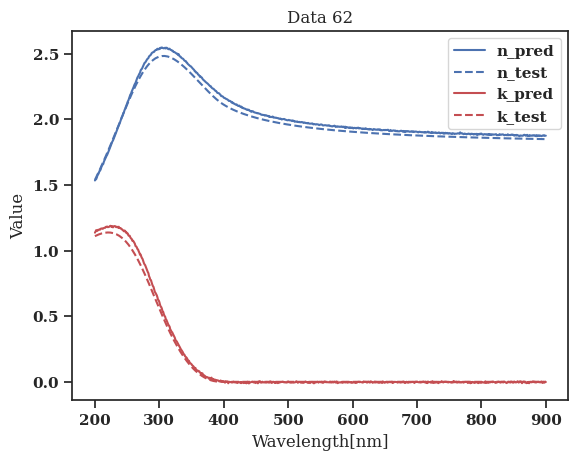

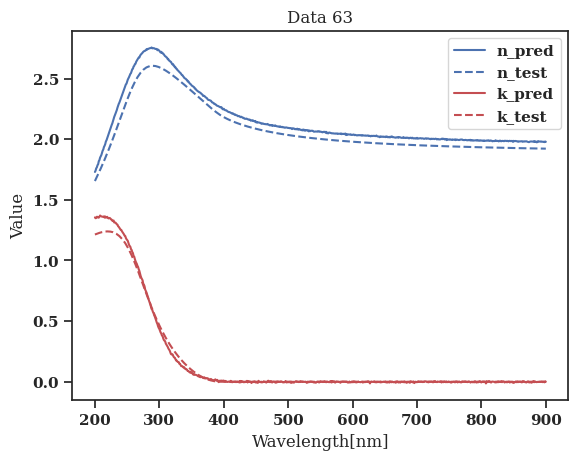

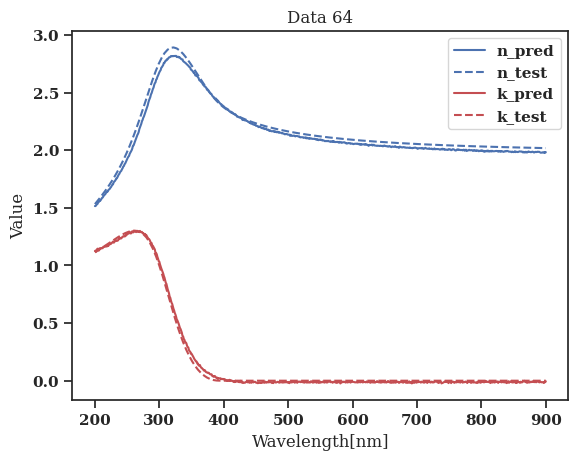

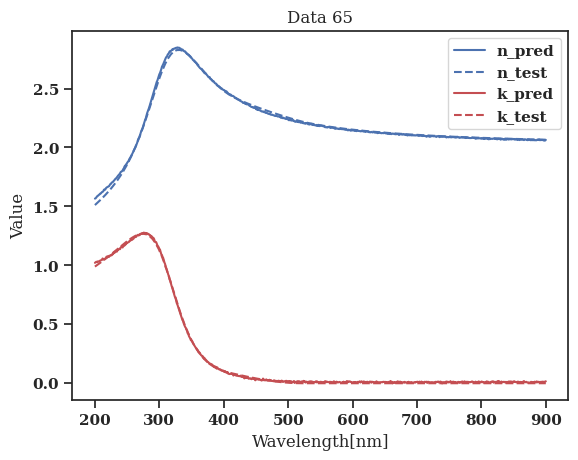

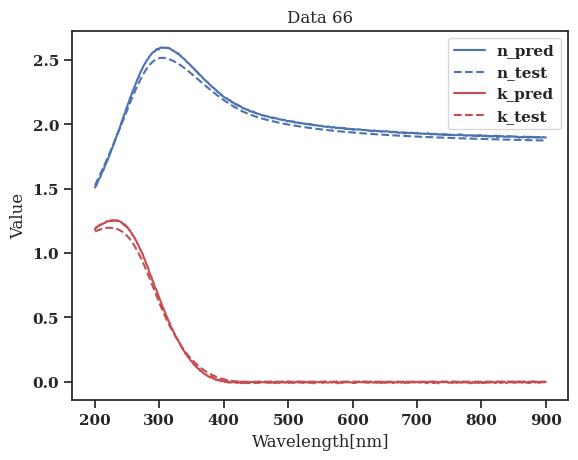

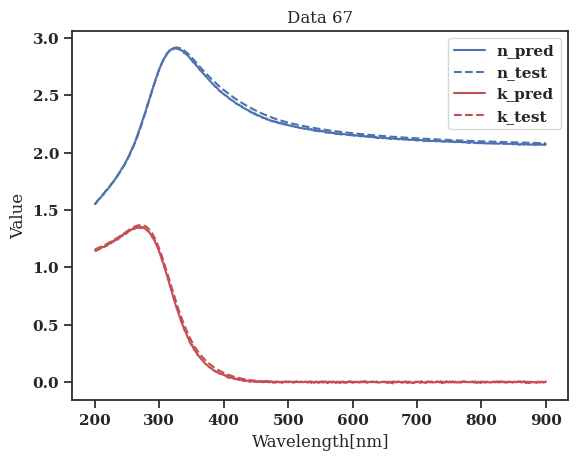

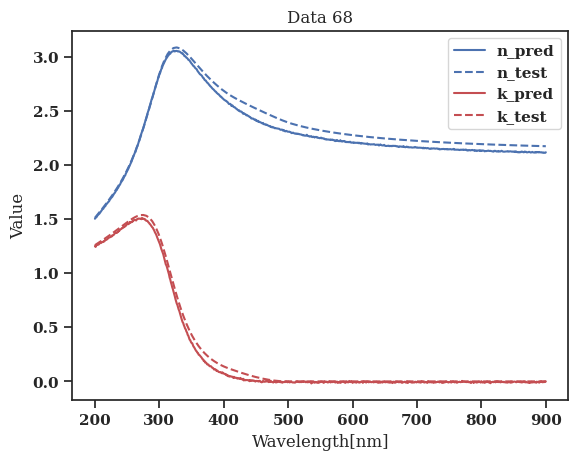

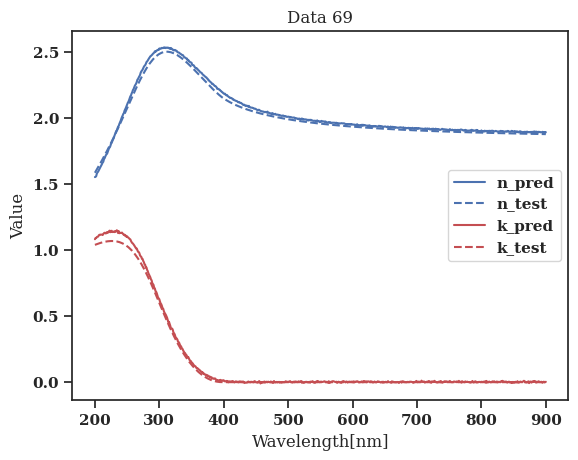

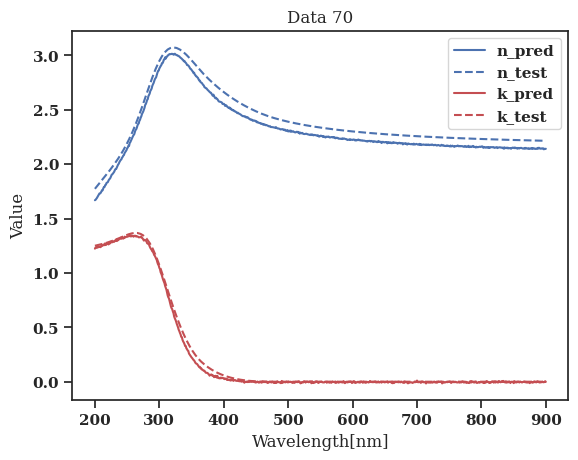

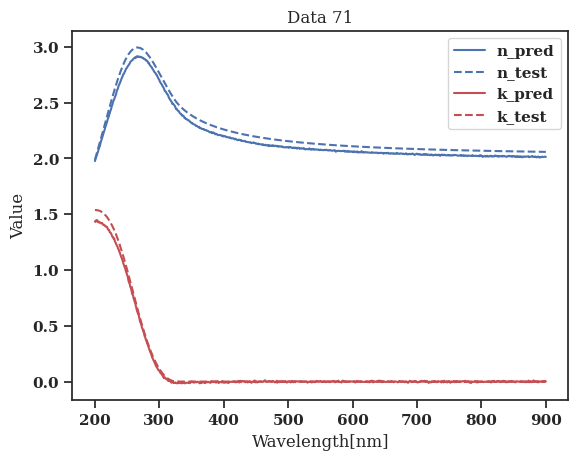

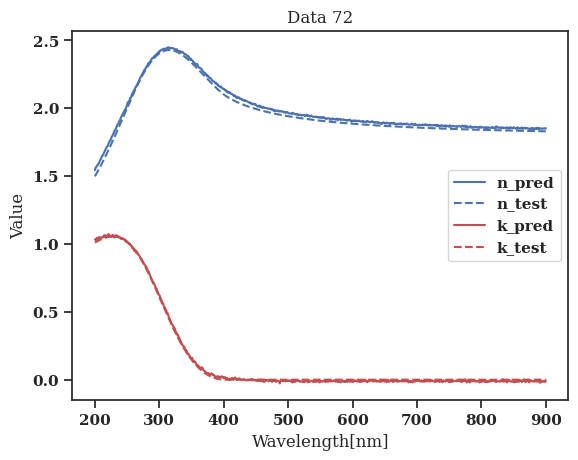

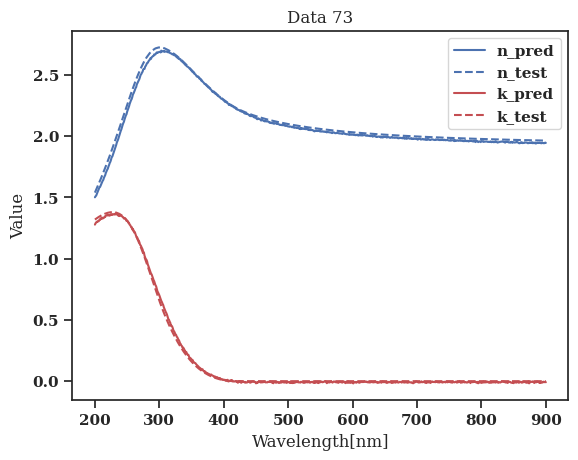

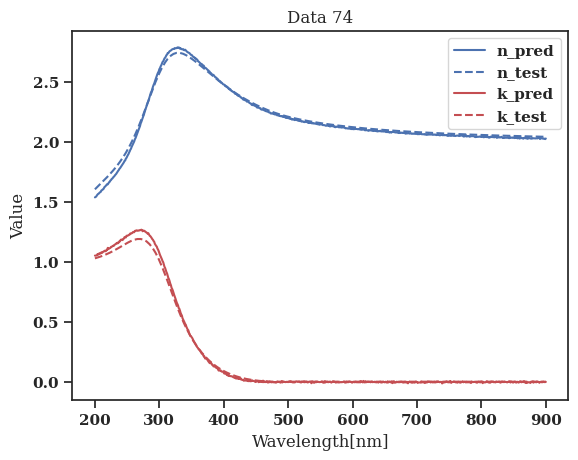

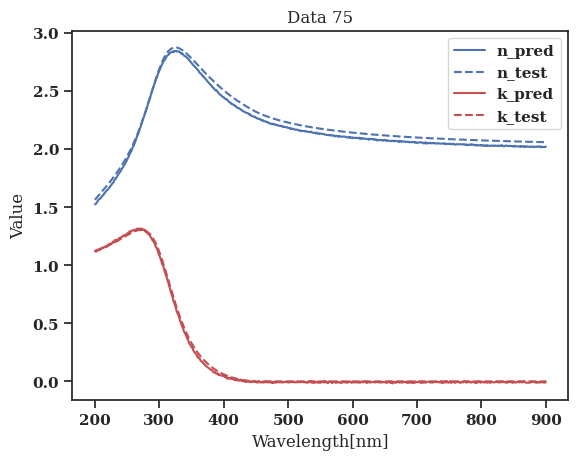

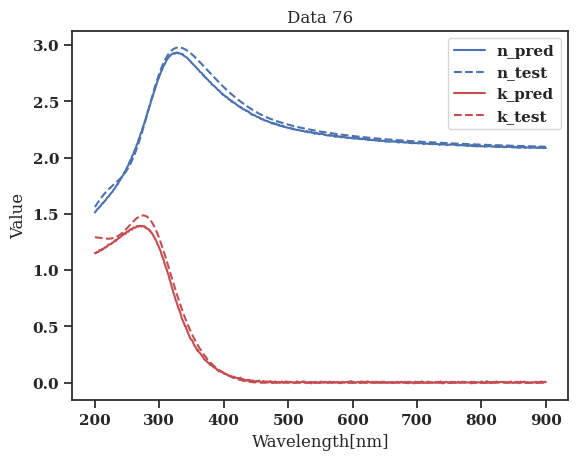

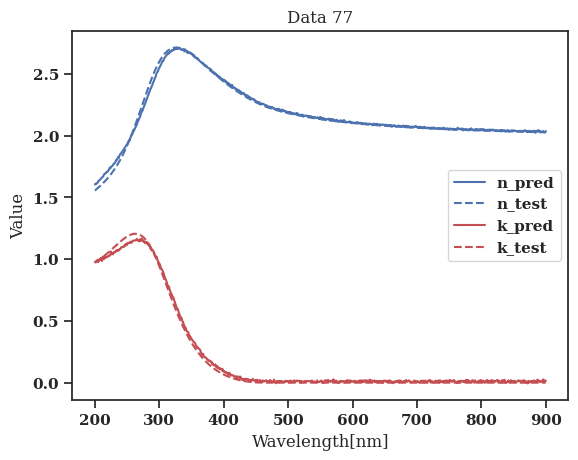

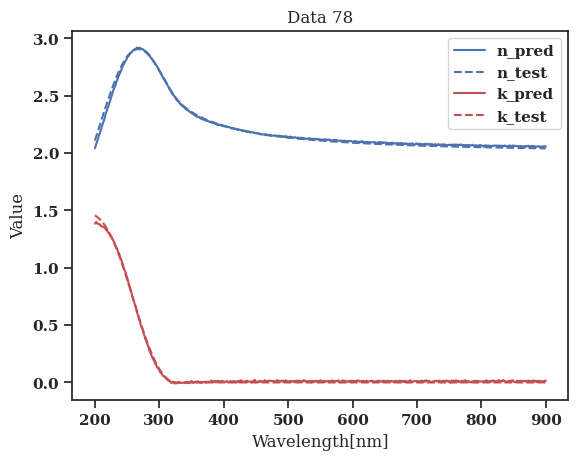

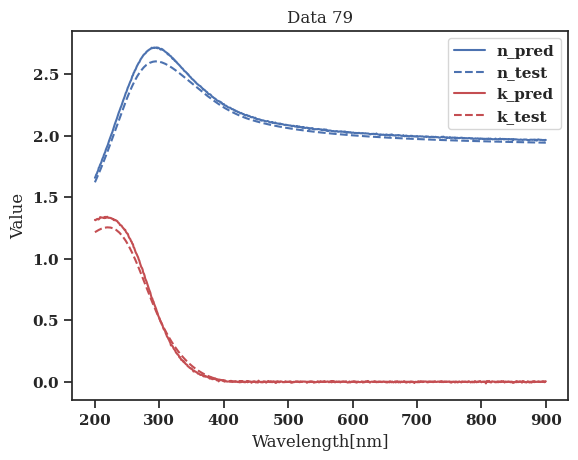

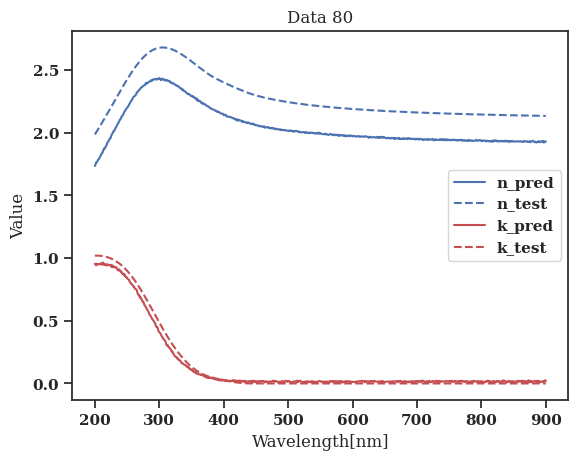

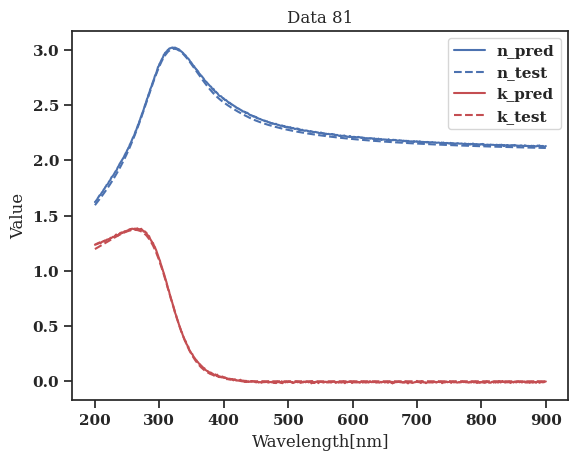

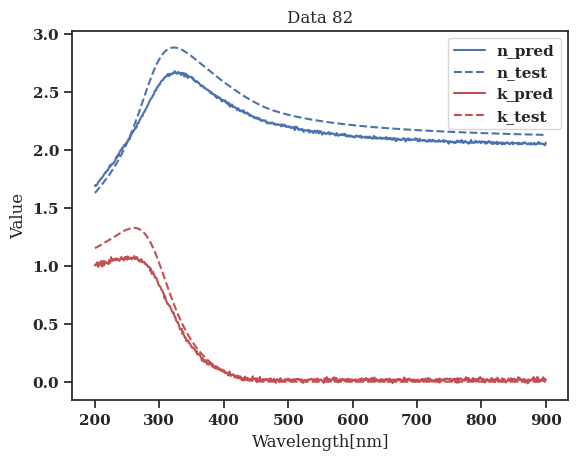

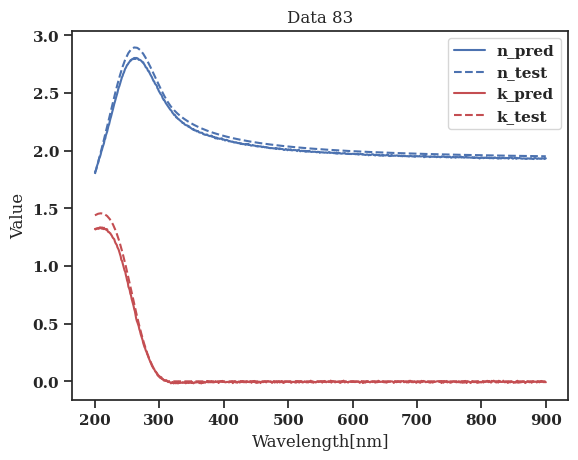

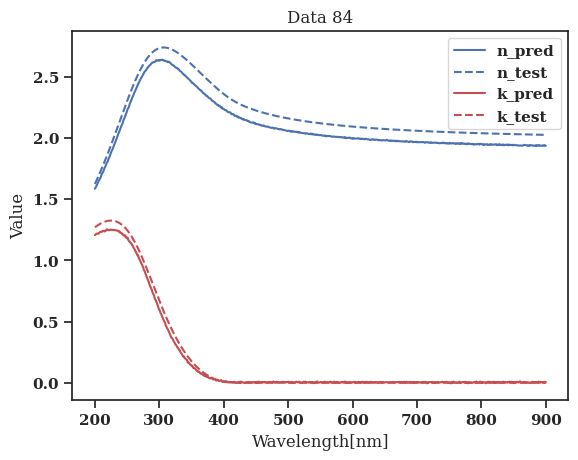

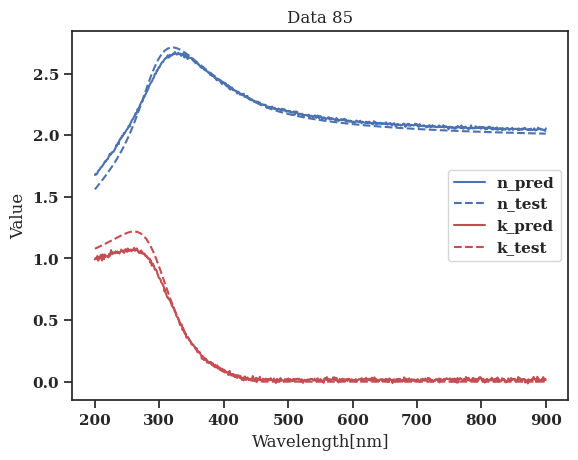

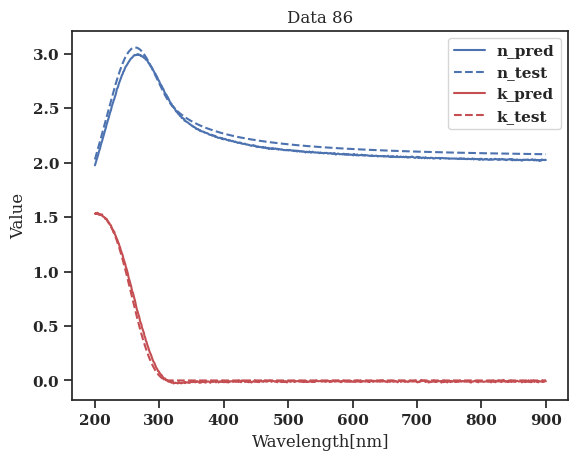

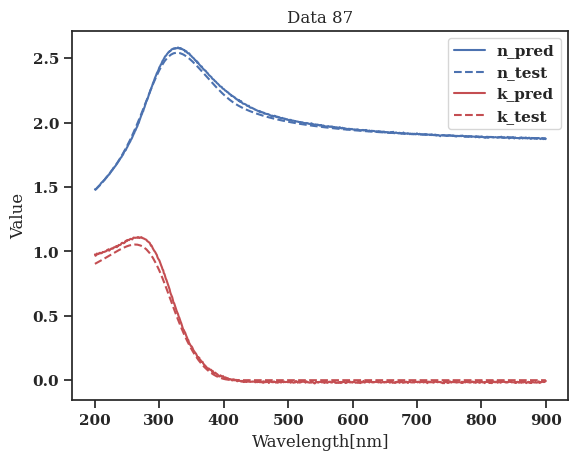

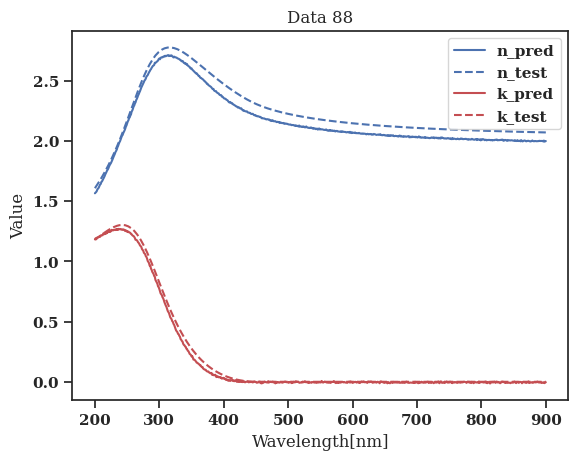

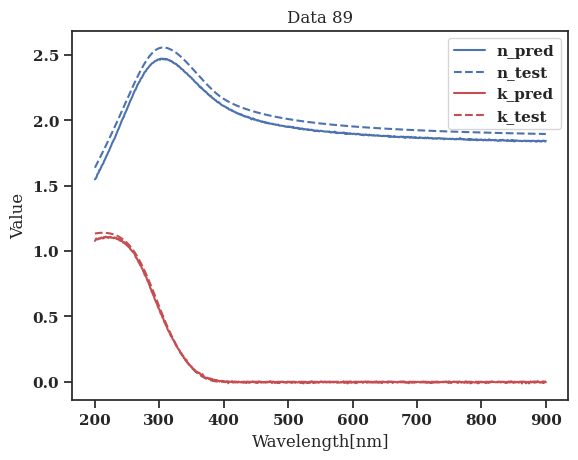

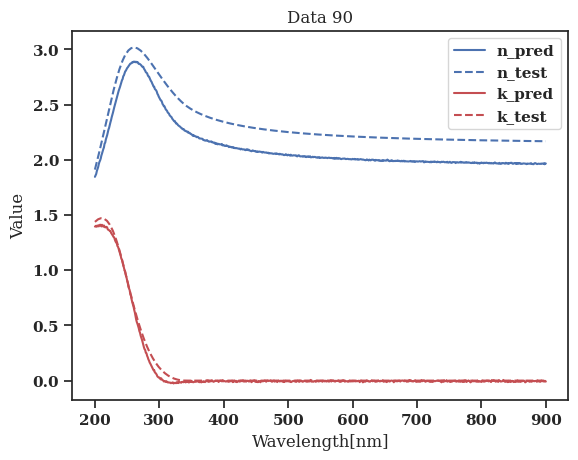

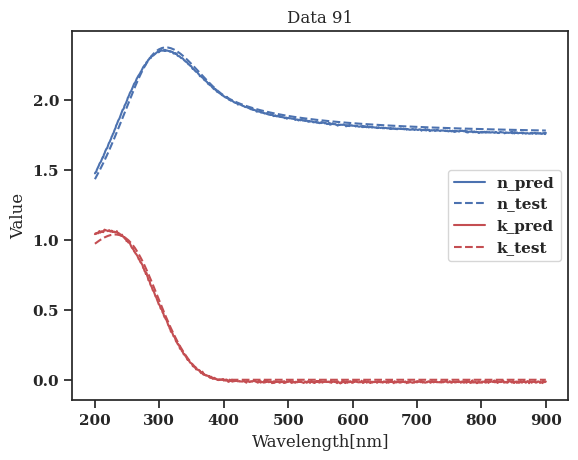

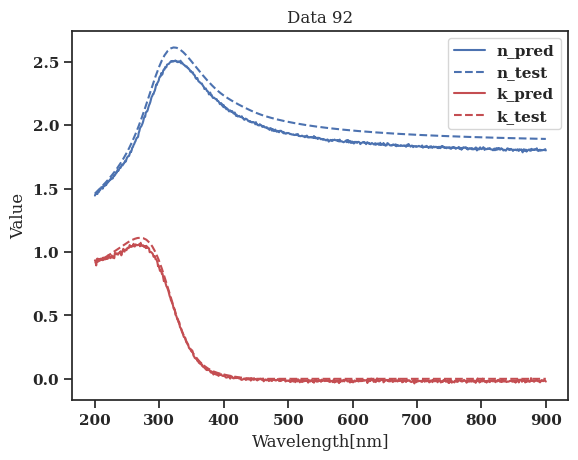

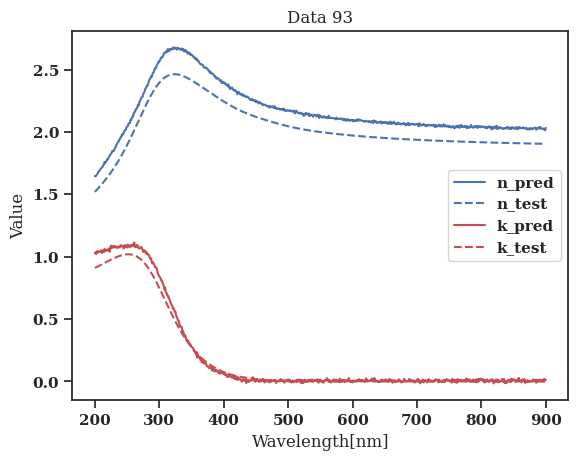

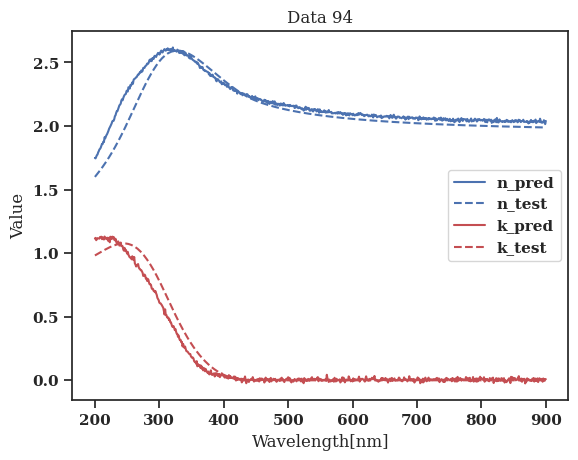

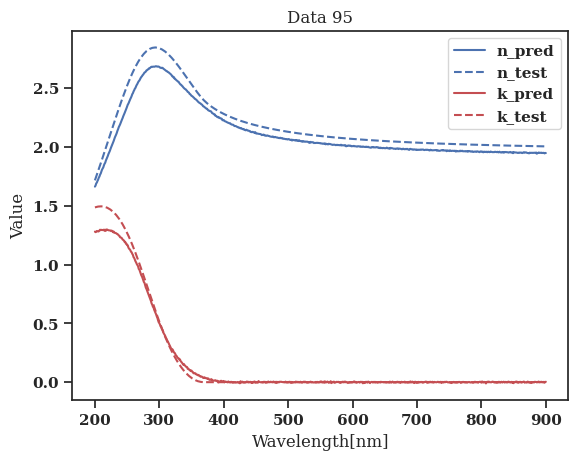

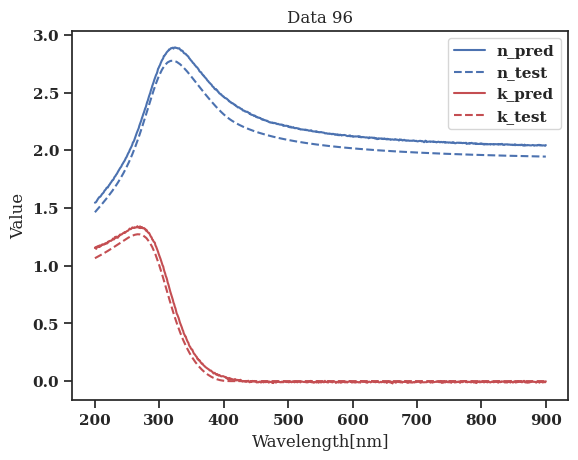

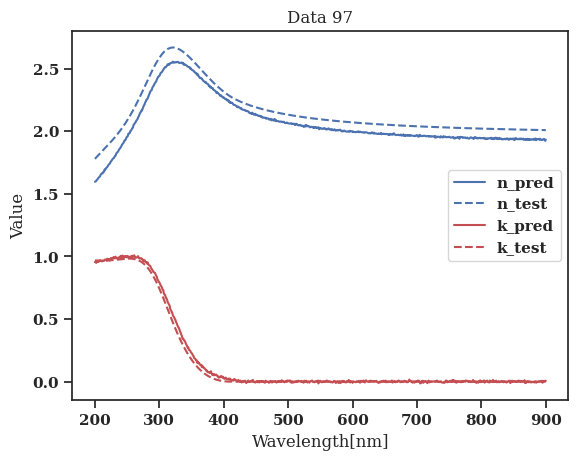

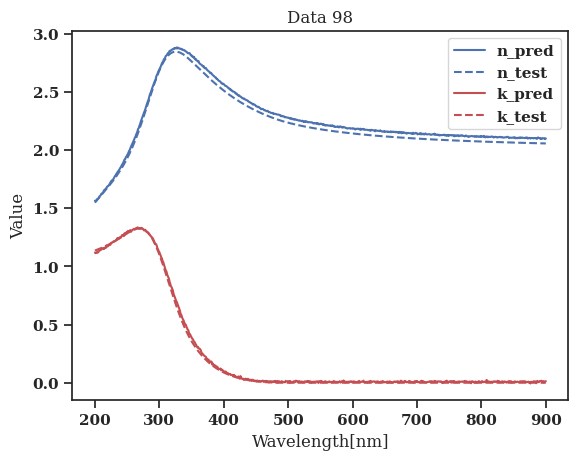

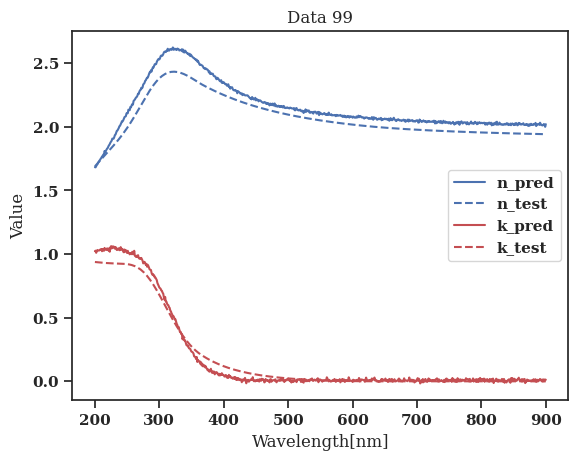

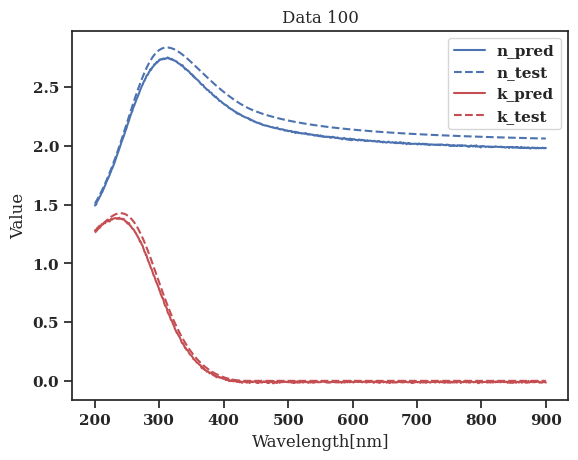

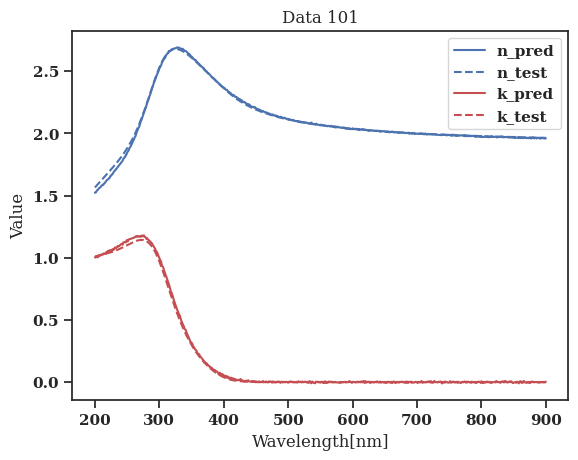

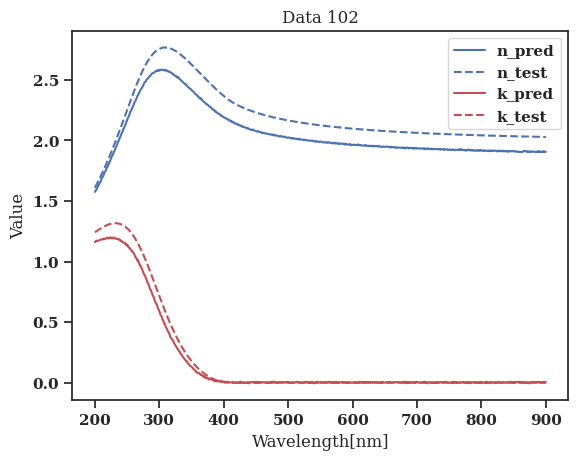

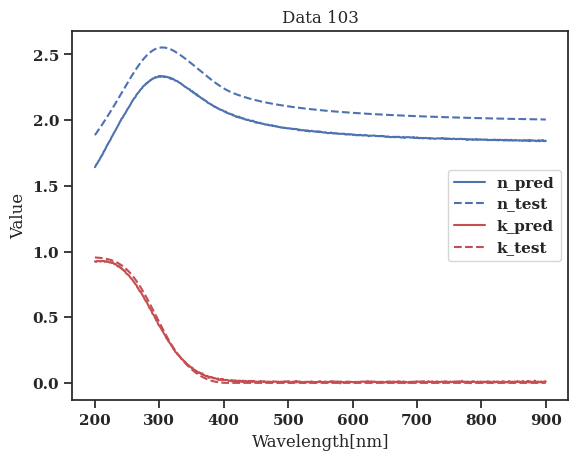

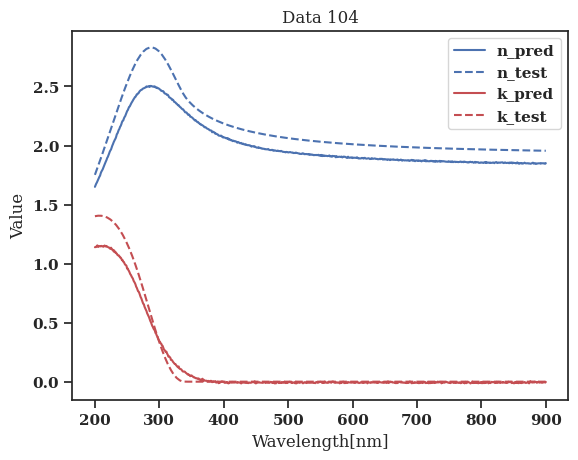

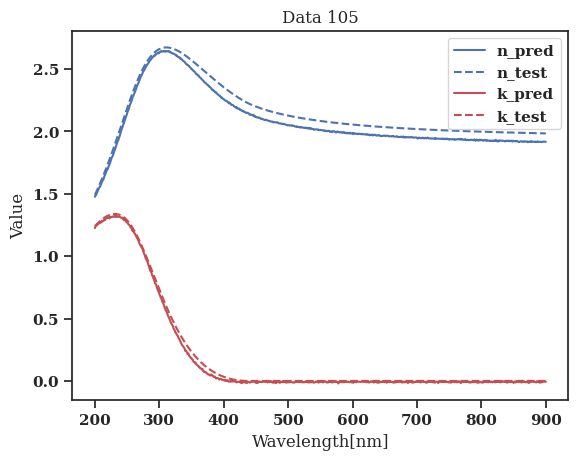

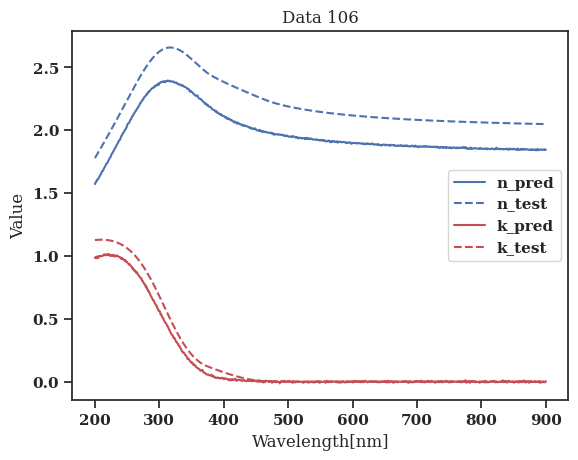

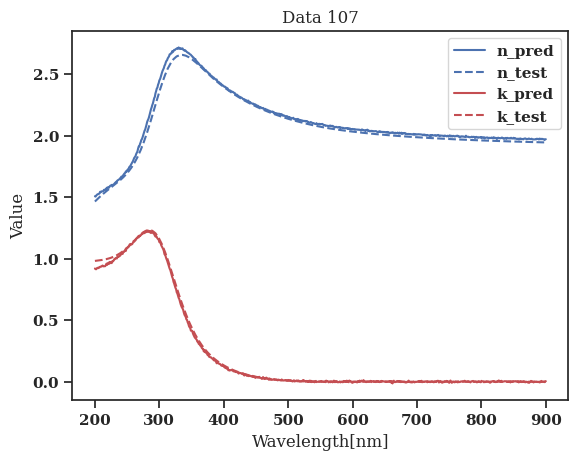

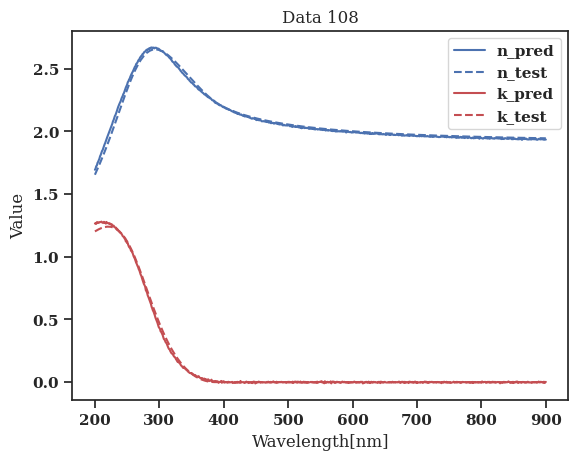

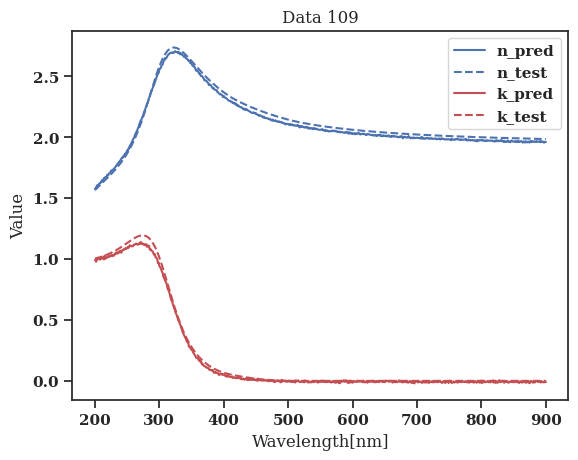

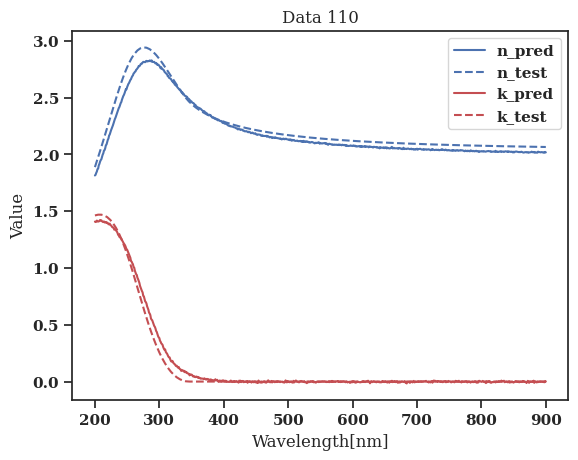

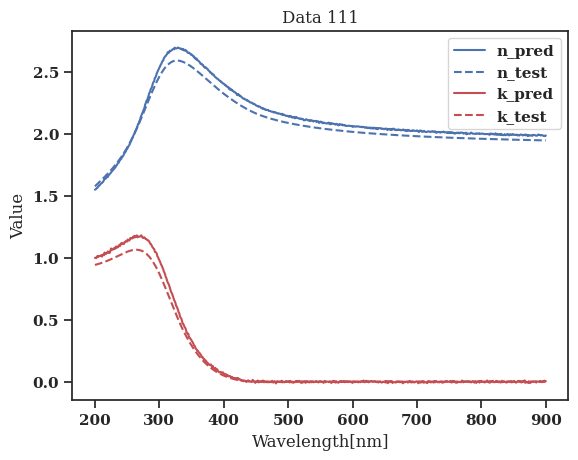

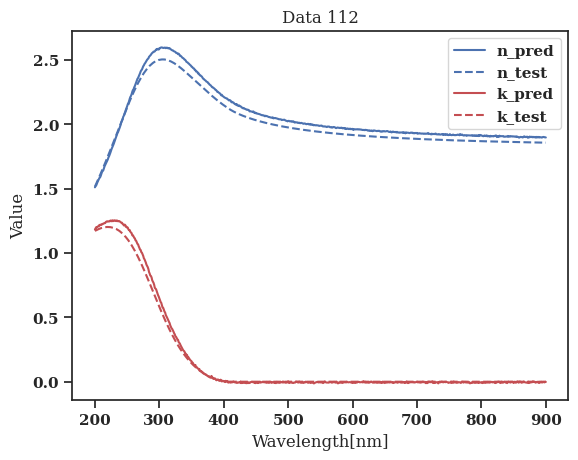

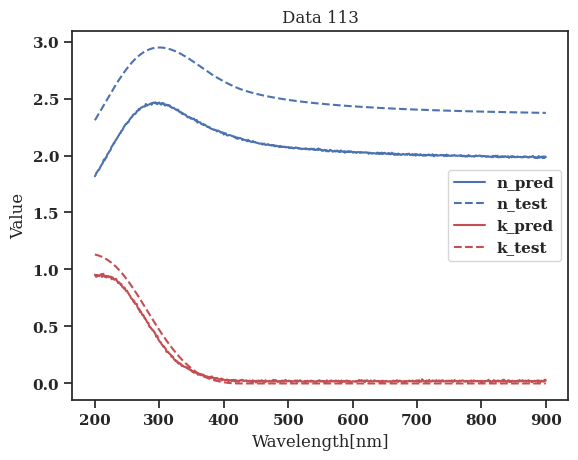

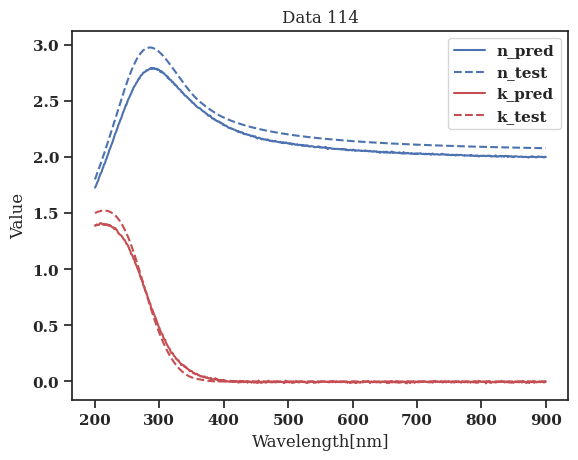

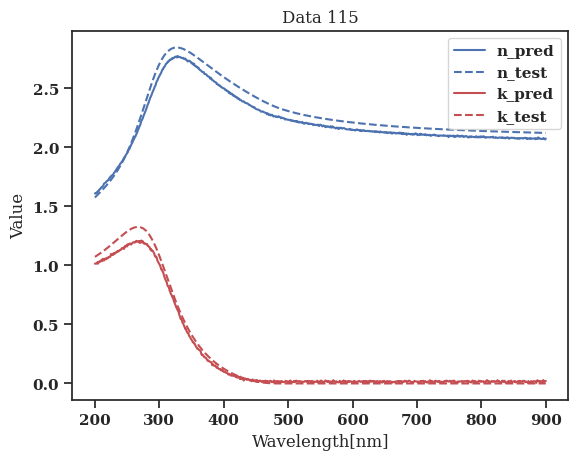

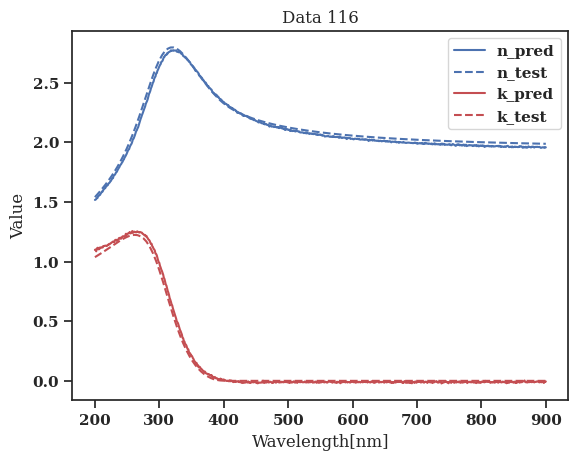

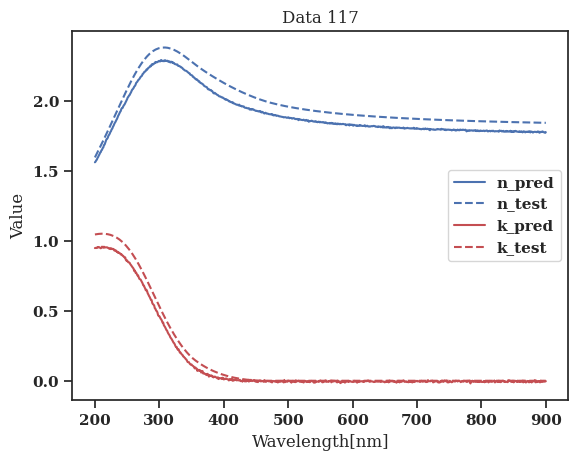

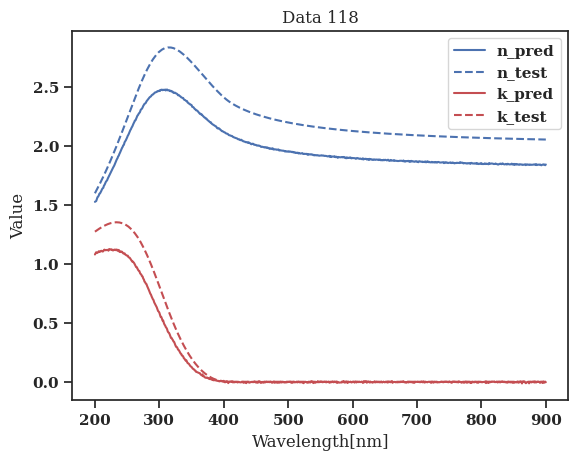

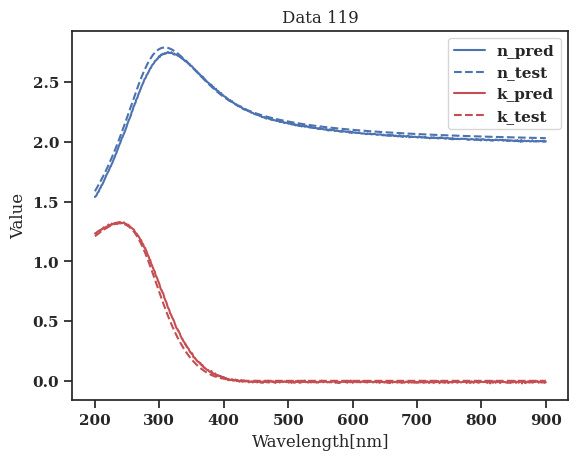

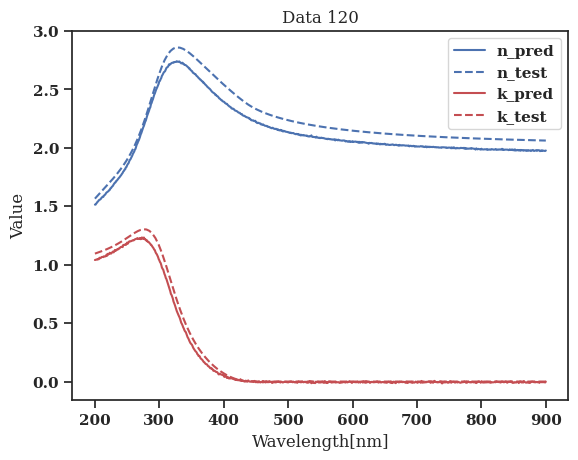

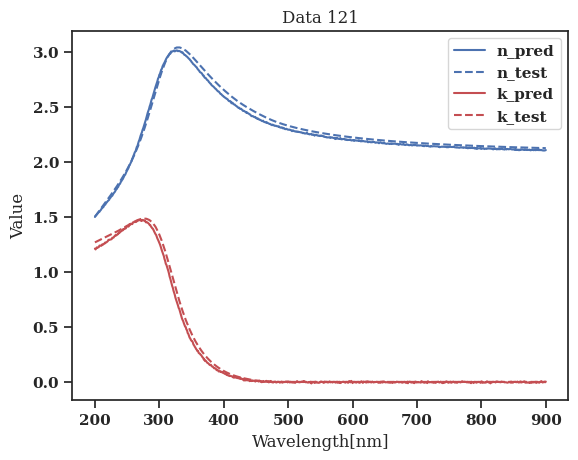

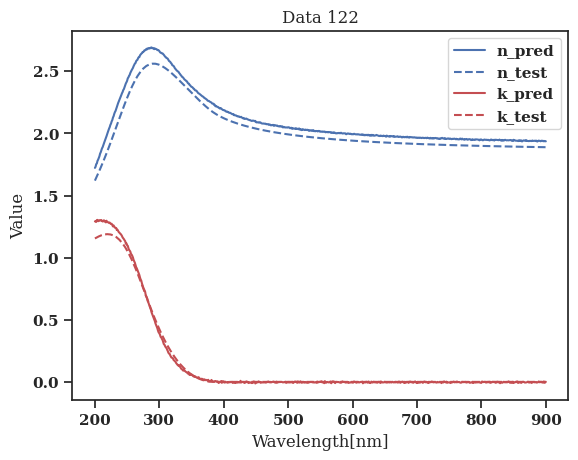

In [24]:
# 生成x坐标轴数据
wavelength = range(200, 901)

# 遍历121个数据，分别绘制四条曲线
for i in range(122):
    plt.figure()
    plt.plot(wavelength, n_pred[i], 'b-', label='n_pred')
    plt.plot(wavelength, n_test[i], 'b--', label='n_test')
    plt.plot(wavelength, k_pred[i], 'r-', label='k_pred')
    plt.plot(wavelength, k_test[i], 'r--', label='k_test')
    # plt.plot(wavelength, PSI_pred[i], 'y-', label='PSI_pred')
    # plt.plot(wavelength, PSI_test[i], 'y--', label='PSI_test')
    # plt.plot(wavelength, DELTA_pred[i], 'g-', label='DELTA_pred')
    # plt.plot(wavelength, DELTA_test[i], 'g--', label='DELTA_test')
    
    plt.xlabel('Wavelength[nm]')
    plt.ylabel('Value')
    plt.title('Data {}'.format(i+1))
    plt.legend()
    plt.show()